### Exploration Well Logs Based On Geological Data for Classification

Brief introduction:

In the activity of exploration of new oil fields, within the life cycle of a project development of new wells, in its initial stage, several crucial activities are required, among them the exploration of the geographical terrain that includes evaluating the characteristics of the geological layers based on its properties and geological formation structure, all this in order to carry out a geological characterization. Due to the prerequisite, small geological samples are extracted from holes that are drilled into the ground at different depths.

With the support of Computational Intelligence Techniques (CIT), the possibilities have been extended to undertake well characterizations more frequently and accurately, making the process of studying these properties more expeditious since it is a task that is expensive to carry out in a traditional way. 

In this project were used two datasets of 24,290 and 12,255 rows respectively, totaling 36,545 records between the two exploratory wells at different depths.

## Table of Contents
* [Problem Statement](#statement)
* [Requirements](#requirements)
* [Data Description](#data)
* [Methodology](#methodology)
* [Data Cleaning and preparation](#preparation)
* [Performing missing data cleaning operation on Table 1](#missingtable1)
* [Performing missing data cleaning operation on Table 2](#missingtable2)
* [Review of the existence of atypical values or outliers](#outliers)
* [Proceed with features important](#features)
* [Reviewing correlations between the features for each table](#correlations)
* [Analysis](#analysis)
* [Results and Discussion](#sesults)
* [Conclusion](#conclusion)

## Problem Statement <a name="statement"></a>

The main objective of this project is to analyze well logs and classify them into one of the two existing categories.

 ## Requirements <a name="requirements"></a>

The following libraries are required:
    
1. pandas
2. numpy
3. seaborn
4. matplotlib
5. sklearn

In [222]:
# Loading all libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as st
import re

import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, make_scorer, accuracy_score, roc_auc_score, roc_curve



from imblearn.over_sampling import RandomOverSampler, SMOTE

from importlib import reload
plt=reload(plt)

## Loading data 

In [8]:
# Loading datasets

df_well_1 = pd.read_csv('well_log_1.csv')
df_well_1.head(5)

,ID,DEPTH,BIT,M1R1,DT,PHIE,CAL,NPHI,M1R2,VCL,...,GAS,LUTITA,ARENISCA,MUDSTONE,MARGA,YMBRITT,PRBRITT,BRITT,ID.1,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,-999.25,2.3390,0.7043,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1869.0,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,-999.25,2.3276,0.7086,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,-999.25,2.3492,0.7029,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,-999.25,2.3772,0.6956,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,-999.25,2.3826,0.6953,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [9]:
df_well_2 = pd.read_csv('well_log_2.csv')
df_well_2.head(5)

,ID,DEPTH,AO10,AO20,AO30,AO60,AO90,BS,CALI,NPHI,...,ZZZZ,AAAAA,BBBBB,CCCCC,DDDDD,EEEEE,FFFFF,GGGGG,ID.1,indice
0,1891,109.0856,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1891.0,0
1,1891,109.2380,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1891,109.3904,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1891,109.5428,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1891,109.6952,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


## Methodology <a name="methodology"></a>

Following the general stages to address a data science problem, the steps mentioned below were followed:

1. Frame the problem 
2. Explore the data to gain insights
3. Prepare the data to better understanding the patterns to Machine Learning
4. Explore many different models 

 ## Data cleaning and preparation <a name="preparation"></a>

## Initial exploration of the datasets

In [10]:
df_well_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24290 entries, 0 to 24289
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          24290 non-null  int64  
 1   DEPTH       24290 non-null  float64
 2   BIT         24290 non-null  float64
 3   M1R1        24290 non-null  float64
 4   DT          24290 non-null  float64
 5   PHIE        24290 non-null  float64
 6   CAL         24290 non-null  float64
 7   NPHI        24290 non-null  float64
 8   M1R2        24290 non-null  float64
 9   VCL         24290 non-null  float64
 10  PHID        24290 non-null  float64
 11  RHOB        24290 non-null  float64
 12  SW          24290 non-null  float64
 13  GR          24290 non-null  float64
 14  M1R3        24290 non-null  float64
 15  M1R6        24290 non-null  float64
 16  M1R9        24290 non-null  float64
 17  M1RX        24290 non-null  float64
 18  BVW         24290 non-null  float64
 19  K_CORTE_@_  24290 non-nul

In [11]:
df_well_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12255 entries, 0 to 12254
Columns: 113 entries, ID to indice
dtypes: float64(110), int64(3)
memory usage: 10.6 MB


In [12]:
df_well_1.columns

Index(['ID', 'DEPTH', 'BIT', 'M1R1', 'DT', 'PHIE', 'CAL', 'NPHI', 'M1R2',
       'VCL', 'PHID', 'RHOB', 'SW', 'GR', 'M1R3', 'M1R6', 'M1R9', 'M1RX',
       'BVW', 'K_CORTE_@_', 'KTIX', 'TVD', 'PAYFLAG', 'GRN', 'VEL.PERF.',
       'GAS', 'LUTITA', 'ARENISCA', 'MUDSTONE', 'MARGA', 'YMBRITT', 'PRBRITT',
       'BRITT', 'ID.1', 'indice'],
      dtype='object')

In [13]:
df_well_2.columns

Index(['ID', 'DEPTH', 'AO10', 'AO20', 'AO30', 'AO60', 'AO90', 'BS', 'CALI',
       'NPHI',
       ...
       'ZZZZ', 'AAAAA', 'BBBBB', 'CCCCC', 'DDDDD', 'EEEEE', 'FFFFF', 'GGGGG',
       'ID.1', 'indice'],
      dtype='object', length=113)

In [14]:
df_well_1.shape

(24290, 35)

In [15]:
df_well_2.shape

(12255, 113)

In [16]:
df_well_1.head(5)

,ID,DEPTH,BIT,M1R1,DT,PHIE,CAL,NPHI,M1R2,VCL,...,GAS,LUTITA,ARENISCA,MUDSTONE,MARGA,YMBRITT,PRBRITT,BRITT,ID.1,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,-999.25,2.3390,0.7043,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1869.0,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,-999.25,2.3276,0.7086,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,-999.25,2.3492,0.7029,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,-999.25,2.3772,0.6956,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,-999.25,2.3826,0.6953,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [17]:
df_well_2.head(5)

,ID,DEPTH,AO10,AO20,AO30,AO60,AO90,BS,CALI,NPHI,...,ZZZZ,AAAAA,BBBBB,CCCCC,DDDDD,EEEEE,FFFFF,GGGGG,ID.1,indice
0,1891,109.0856,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1891.0,0
1,1891,109.2380,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1891,109.3904,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1891,109.5428,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1891,109.6952,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [18]:
df_well_1.describe()

,ID,DEPTH,BIT,M1R1,DT,PHIE,CAL,NPHI,M1R2,VCL,...,GAS,LUTITA,ARENISCA,MUDSTONE,MARGA,YMBRITT,PRBRITT,BRITT,ID.1,indice
count,24290.0,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,...,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,24290.000000,1.0,24290.000000
mean,1869.0,1198.410900,-164.713154,-5.188658,69.801505,-24.255817,-165.746345,-219.097000,-5.614187,-9.380791,...,-165.444010,-164.228818,-182.028736,-208.166859,-208.519679,-232.796818,-220.911458,-226.854138,1869.0,12144.500000
std,0.0,534.319228,378.283241,100.826726,157.723600,153.837709,379.079450,413.699842,100.560034,99.921354,...,431.146906,432.395864,423.137401,408.852529,408.616730,442.616917,449.563137,446.086966,NaN,7012.063355
min,1869.0,273.000000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1869.0,0.000000
25%,1869.0,735.705450,6.750000,2.194350,78.078200,0.000200,6.564000,0.162000,2.219000,0.644000,...,14.461500,0.000000,0.000000,0.000000,0.000000,-5.632650,-6.455875,-6.043375,1869.0,6072.250000
50%,1869.0,1198.410900,6.750000,2.788400,91.762200,0.002600,6.610700,0.242100,2.756050,0.759200,...,60.230800,46.153800,10.769200,0.000000,0.000000,11.441750,26.379650,18.915900,1869.0,12144.500000
75%,1869.0,1661.116350,6.750000,4.582150,106.271275,0.019875,6.640200,0.311800,4.360850,0.834600,...,71.846200,81.538500,50.769200,0.000000,0.000000,29.578875,48.840900,39.197375,1869.0,18216.750000
max,1869.0,2123.821800,6.750000,455.349900,139.161400,0.132600,12.364500,0.433700,205.147400,1.000000,...,89.000000,100.000000,100.000000,100.000000,90.000000,130.190500,120.872500,125.531500,1869.0,24289.000000


In [19]:
df_well_2.describe()

,ID,DEPTH,AO10,AO20,AO30,AO60,AO90,BS,CALI,NPHI,...,ZZZZ,AAAAA,BBBBB,CCCCC,DDDDD,EEEEE,FFFFF,GGGGG,ID.1,indice
count,12255.0,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,...,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,1.0,12255.000000
mean,1891.0,1042.840400,-210.540940,-210.898680,3.181794,-211.054626,3.095323,-205.959466,4.715158,-215.547824,...,-995.261030,-995.754622,-995.354512,-995.352986,-995.353012,-995.923195,-995.399456,-991.088064,1891.0,6127.000000
std,0.0,539.169576,413.962683,413.749196,44.908413,413.519610,44.191372,412.484516,69.854869,411.267699,...,70.012984,61.084946,68.149436,68.322784,68.322330,58.138237,67.555826,93.341138,NaN,3537.858109
min,1891.0,109.085600,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,0.000000
25%,1891.0,575.963000,1.932000,1.918550,2.185300,2.042250,2.515250,8.500000,8.549450,0.122800,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,3063.500000
50%,1891.0,1042.840400,2.921600,2.832400,2.868300,2.972800,3.100300,8.500000,8.689100,0.230500,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,6127.000000
75%,1891.0,1509.717800,4.783800,4.711150,4.712650,4.760700,4.699800,8.500000,9.049000,0.299900,...,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000,1891.0,9190.500000
max,1891.0,1976.595200,561.925700,983.671000,380.834500,200.189200,169.243100,12.250000,18.575600,0.458800,...,357.775700,81.688700,216.601900,303.773500,303.765200,20.000000,348.184200,82.398900,1891.0,12254.000000


## Data Cleaning and Preparation  <a name="preparation"></a>

### Verification and correction of data types

In [20]:
# Converting the date feature to the most appropriate data type

#df_well_1 #['date'] = pd.to_datetime(df_marketing_orders['date'])

In [21]:
df_well_1.columns = map(str.lower, df_well_1.columns)
df_well_1.head(5)

,id,depth,bit,m1r1,dt,phie,cal,nphi,m1r2,vcl,...,gas,lutita,arenisca,mudstone,marga,ymbritt,prbritt,britt,id.1,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,-999.25,2.3390,0.7043,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1869.0,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,-999.25,2.3276,0.7086,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,-999.25,2.3492,0.7029,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,-999.25,2.3772,0.6956,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,-999.25,2.3826,0.6953,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


In [22]:
df_well_2.columns = map(str.lower, df_well_2.columns)
df_well_2.head(5)

,id,depth,ao10,ao20,ao30,ao60,ao90,bs,cali,nphi,...,zzzz,aaaaa,bbbbb,ccccc,ddddd,eeeee,fffff,ggggg,id.1,indice
0,1891,109.0856,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1891.0,0
1,1891,109.2380,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,1
2,1891,109.3904,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,2
3,1891,109.5428,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,3
4,1891,109.6952,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,NaN,4


### Check for duplicate values

In [23]:
df_well_1.duplicated().sum()

0

In [24]:
df_well_2.duplicated().sum()

0

### Check for missing values

In [25]:
df_well_1.isna().sum()

id                0
depth             0
bit               0
m1r1              0
dt                0
phie              0
cal               0
nphi              0
m1r2              0
vcl               0
phid              0
rhob              0
sw                0
gr                0
m1r3              0
m1r6              0
m1r9              0
m1rx              0
bvw               0
k_corte_@_        0
ktix              0
tvd               0
payflag           0
grn               0
vel.perf.         0
gas               0
lutita            0
arenisca          0
mudstone          0
marga             0
ymbritt           0
prbritt           0
britt             0
id.1          24289
indice            0
dtype: int64

In [26]:
df_well_2.isna().sum()

id            0
depth         0
ao10          0
ao20          0
ao30          0
          ...  
eeeee         0
fffff         0
ggggg         0
id.1      12254
indice        0
Length: 113, dtype: int64

When reviewing the missing data in a traditional way, no values were found, however when searching in the literature, it is denoted that those cells with values -999.25, denote missing values, so a second review is carried out adding the new one. precision.

The criterion was adopted that those with columns with more than 20% missing data are removed.

### Review again of missing data identified with -999.25 in a Second Phase

In [27]:
#mis_booleans = (df['Age'].isna())&(df['Survived']==1 )
#df_new = df[mis_booleans].groupby(['Embarked', 'Sex'])['Sex'].count()

# First the negative values are detected in each column 

#mis_booleans = (df_well_1['arenisca'] == -999)
#df_new = df_well_1[mis_booleans].count()
#df_new
#df.eq(-999).any().sum()
#df_well_1.eq(-999).any().sum()


In [28]:
# Get the unique values of 'B' column
df_well_1.nphi.unique()

array([-9.9925e+02,  3.0460e-01,  3.1140e-01, ...,  1.4420e-01,
        1.4570e-01,  1.6410e-01])

In [29]:
#df.isin(['?']).sum(axis=0)

#df_well_1.isin(['-999']).sum(axis=0)
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte_@_', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.',
       'gas', 'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'id.1', 'indice'],
      dtype='object')

In [30]:
df_well_1.rename(columns={'k_corte_@_':'k_corte'}, inplace=True)

## Performing missing data cleaning operation on Table 1  <a name="missingtable1"></a>

In [31]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.', 'gas',
       'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'id.1', 'indice'],
      dtype='object')

In [32]:
df_well_2.columns

Index(['id', 'depth', 'ao10', 'ao20', 'ao30', 'ao60', 'ao90', 'bs', 'cali',
       'nphi',
       ...
       'zzzz', 'aaaaa', 'bbbbb', 'ccccc', 'ddddd', 'eeeee', 'fffff', 'ggggg',
       'id.1', 'indice'],
      dtype='object', length=113)

In [33]:
#df_well_2['k_corte_@_']
df_well_2.rename(columns={'k_corte_@_':'k_corte'}, inplace=True)

In [34]:
df_well_1= df_well_1.drop(['id.1'], axis=1)

In [35]:
df_well_2= df_well_2.drop(['id.1'], axis=1)

In [36]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.', 'gas',
       'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'indice'],
      dtype='object')

When reviewing the literature, it is detected that the columns under the name 'zzzz', 'aaaaa', 'bbbbb', 'ccccc', 'ddddd', 'eeeee', 'fffff', and so on do not provide value and are a product of errors in measurements, then they are eliminated in table 2.

In [37]:
df_well_2= df_well_2.drop(['zzzz', 'aaaaa', 'bbbbb', 'ccccc', 'ddddd', 'eeeee', 'fffff', 'ggggg'], axis=1)

In [38]:
df_well_2.columns

Index(['id', 'depth', 'ao10', 'ao20', 'ao30', 'ao60', 'ao90', 'bs', 'cali',
       'nphi',
       ...
       'hazi_3', 'p1az_3', 'p1no_2', 'quaf_3', 'rb_2', 'dpap_3', 'wwww',
       'xxxx', 'yyyy', 'indice'],
      dtype='object', length=104)

In [39]:
df_well_2= df_well_2.drop(['wwww','xxxx', 'yyyy'], axis=1)

In [40]:
df_well_2.columns

Index(['id', 'depth', 'ao10', 'ao20', 'ao30', 'ao60', 'ao90', 'bs', 'cali',
       'nphi',
       ...
       'dpap_2', 'dpaz_3', 'dptr_3', 'hazi_3', 'p1az_3', 'p1no_2', 'quaf_3',
       'rb_2', 'dpap_3', 'indice'],
      dtype='object', length=101)

In [41]:
df_well_1.shape[0]

24290

In [42]:
(df_well_1[df_well_1 == -999.25].count())/df_well_1.shape[0] *100

id            0.000000
depth         0.000000
bit          17.044051
m1r1          1.008646
dt            2.107863
phie          2.428983
cal          17.138740
nphi         21.947303
m1r2          1.008646
vcl           1.008646
phid          0.000000
rhob         21.836147
sw            2.428983
gr            2.260189
m1r3          1.008646
m1r6          1.008646
m1r9          1.008646
m1rx          1.008646
bvw           2.428983
k_corte       0.000000
ktix          0.000000
tvd           0.000000
payflag       0.000000
grn           1.379168
vel.perf.    21.062166
gas          21.062166
lutita       21.062166
arenisca     21.062166
mudstone     21.062166
marga        21.062166
ymbritt      24.985591
prbritt      24.985591
britt        24.985591
indice        0.000000
dtype: float64

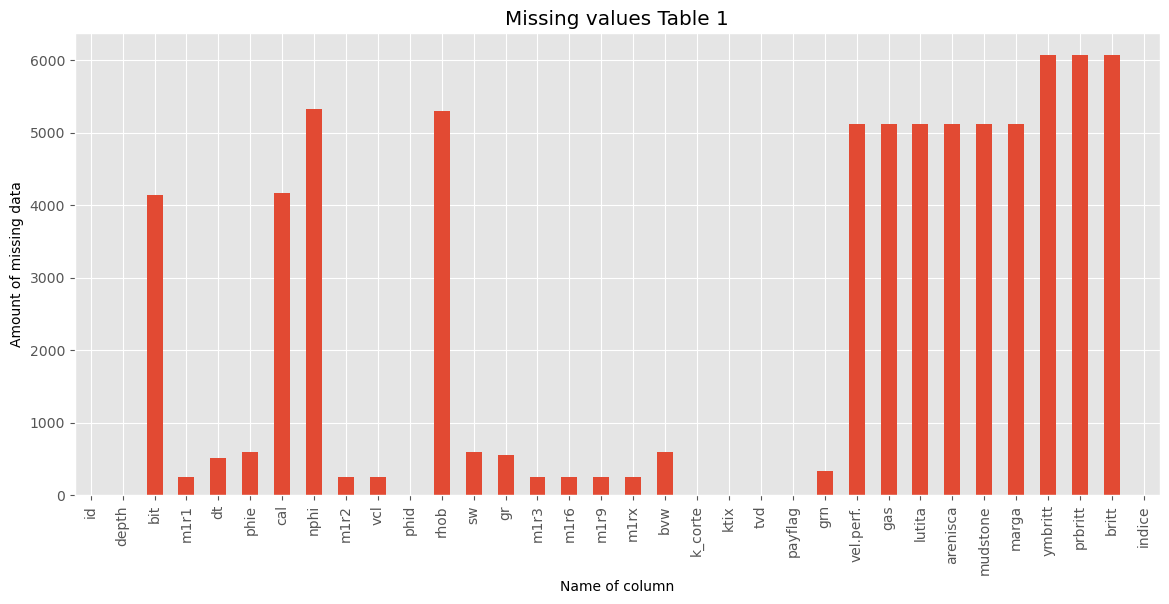

In [43]:
plt.style.use('ggplot')

#df_well_1.groupby(-999.2500).count()
#index, counts = np.unique(df_well_1.values,return_counts=True)
df_well_1[df_well_1 == -999.25].count().plot(kind='bar', rot= 90, title='Missing values Table 1', ylabel='Amount of missing data' , xlabel='Name of column', figsize=(14, 6))
#.plot(kind='bar', rot= 0, title='Faltantes', ylabel='Total', xlabel='Tipos de establecimientos', figsize=(14, 6))
plt.savefig("images/barplot_Missing_values_Table_1.png", dpi=600, bbox_inches='tight', pad_inches=0.5)  
plt.show()

Partial conclusion:

As can be seen, there are 11 columns with missing data above 20%, so they are removed from Table 1.

In [44]:
collist = df_well_1.columns
collist 

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'nphi', 'm1r2',
       'vcl', 'phid', 'rhob', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx',
       'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'grn', 'vel.perf.', 'gas',
       'lutita', 'arenisca', 'mudstone', 'marga', 'ymbritt', 'prbritt',
       'britt', 'indice'],
      dtype='object')

In [45]:
collistadjusted = pd.DataFrame()
#collistadjusted = (df_well_1[df_well_1 == -999.25].count())/df_well_1.shape[0] *100
collistadjusted = df_well_1[df_well_1 == -999.25].count().reset_index()
collistadjusted

,index,0
0,id,0
1,depth,0
2,bit,4140
3,m1r1,245
4,dt,512
5,phie,590
6,cal,4163
7,nphi,5331
8,m1r2,245
9,vcl,245


In [46]:
#collistadjusted['remaining_rows']
#collistadjusted.rename(columns={'0':'remaining_rows'})
collistadjusted.rename(columns={0:'remaining_rows'}, inplace=True)
collistadjusted

,index,remaining_rows
0,id,0
1,depth,0
2,bit,4140
3,m1r1,245
4,dt,512
5,phie,590
6,cal,4163
7,nphi,5331
8,m1r2,245
9,vcl,245


In [47]:
collistadjusted['amount_remaining'] = collistadjusted['remaining_rows'] /df_well_1.shape[0] *100
collistadjusted['amount_remaining']

0      0.000000
1      0.000000
2     17.044051
3      1.008646
4      2.107863
5      2.428983
6     17.138740
7     21.947303
8      1.008646
9      1.008646
10     0.000000
11    21.836147
12     2.428983
13     2.260189
14     1.008646
15     1.008646
16     1.008646
17     1.008646
18     2.428983
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     1.379168
24    21.062166
25    21.062166
26    21.062166
27    21.062166
28    21.062166
29    21.062166
30    24.985591
31    24.985591
32    24.985591
33     0.000000
Name: amount_remaining, dtype: float64

Partial conclusion:

As can be seen, there are 11 columns with missing data above 20%, so they are removed from Table 1.

In [48]:
#collistadjusted['amount_remaining']
#df_well_2= df_well_2.drop(['wwww','xxxx', 'yyyy'], axis=1)

#collistadjusted.drop(axis=1, thresh = int(0.2*df.shape[0]), inplace=True)
#df = df.loc[:, df.isnull().mean() < .8]

#df_new = collistadjusted.loc[:, collistadjusted['amount_remaining'] < .20]

#max_number_of_nas = 3000
#df_new = collistadjusted.loc[:, (collistadjusted['amount_remaining'] < 0.20)]

#collistadjusted.drop(collistadjusted.columns[collistadjusted.apply(lambda col: collistadjusted[col] > 3)], axis=1)
#collistadjusted

In [49]:
#df[df['Species'] != 'Cat']

df_new = collistadjusted[collistadjusted['amount_remaining'] > 20]
df_new

,index,remaining_rows,amount_remaining
7,nphi,5331,21.947303
11,rhob,5304,21.836147
24,vel.perf.,5116,21.062166
25,gas,5116,21.062166
26,lutita,5116,21.062166
27,arenisca,5116,21.062166
28,mudstone,5116,21.062166
29,marga,5116,21.062166
30,ymbritt,6069,24.985591
31,prbritt,6069,24.985591


In [50]:
listica = df_new['index']
listicaa =list(listica) 
listicaa

['nphi',
 'rhob',
 'vel.perf.',
 'gas',
 'lutita',
 'arenisca',
 'mudstone',
 'marga',
 'ymbritt',
 'prbritt',
 'britt']

In [51]:
# Before removing columns with more than 20% missing

#df_well_1.columns

In [52]:
df_well_1= df_well_1.drop(['nphi',
 'rhob',
 'vel.perf.',
 'gas',
 'lutita',
 'arenisca',
 'mudstone',
 'marga',
 'ymbritt',
 'prbritt',
 'britt'], axis=1)

In [53]:
# After removing columns with more than 20% missing

df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'payflag', 'grn', 'indice'],
      dtype='object')

<Axes: title={'center': 'Missing values Table 1'}, xlabel='Name of column', ylabel='Amount'>

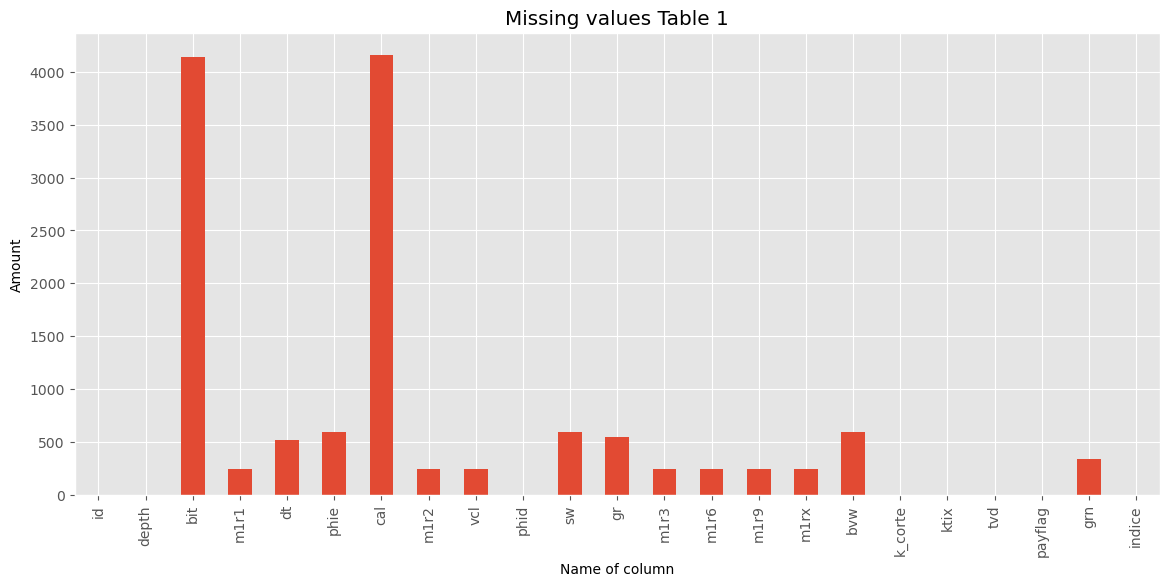

In [54]:
df_well_1[df_well_1 == -999.25].count().plot(kind='bar', rot= 90, title='Missing values Table 1', ylabel='Amount' , xlabel='Name of column', figsize=(14, 6))

In [55]:
df_well_1.shape

(24290, 23)

Up to this point, 12 columns have been removed with more than 20% of rows with a value of -999.25 in table 1, which is indicative of the absence of data to be able to apply the classification algorithms.

## Performing missing data cleaning operation on Table 2  <a name="missingtable2"></a>

In [56]:
#collistadjusted2.rename(columns={0:'remaining_rows'}, inplace=True)
collistadjusted.rename(columns={0:'remaining_rows'}, inplace=True)

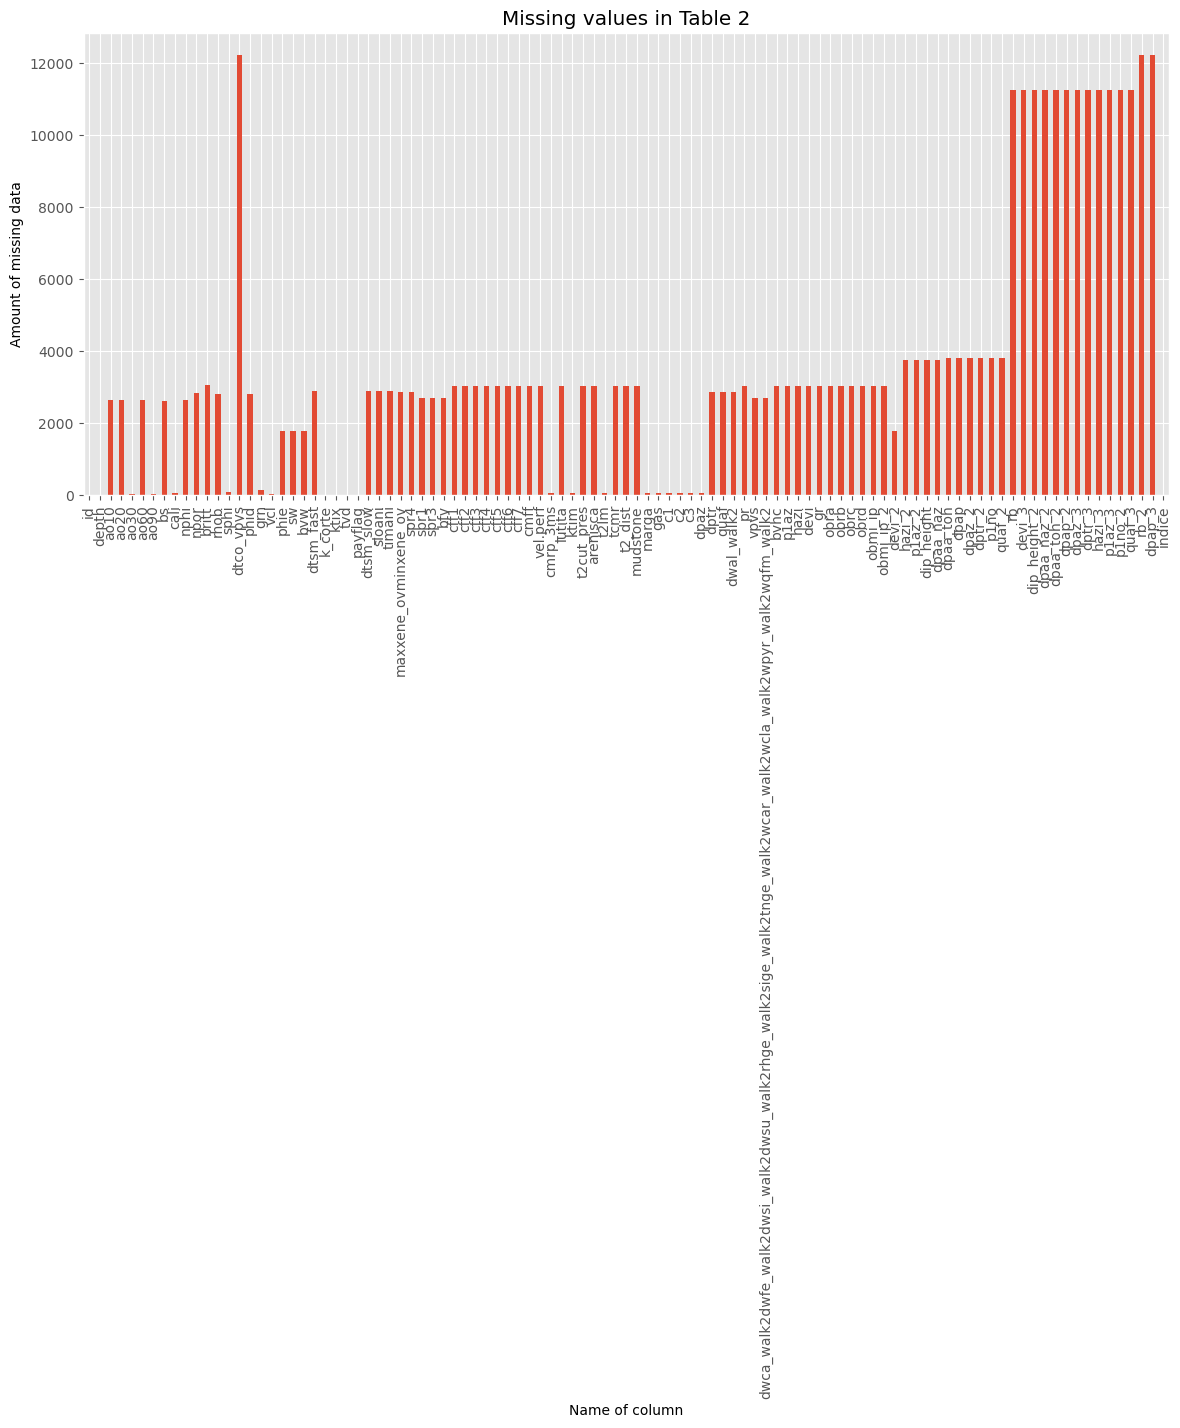

In [57]:
# Sample table 2 before

df_well_2[df_well_2 == -999.25].count().plot(kind='bar', rot= 90, title='Missing values in Table 2', ylabel='Amount of missing data' , xlabel='Name of column', figsize=(14, 6))

plt.savefig("images/barplot_Missing_values_Table_2.png", dpi=600, bbox_inches='tight', pad_inches=0.5)  
plt.show()

In [58]:
collistadjusted2 = df_well_2[df_well_2 == -999.25].count().reset_index()
collistadjusted2

,index,0
0,id,0
1,depth,0
2,ao10,2644
3,ao20,2644
4,ao30,23
...,...,...
96,p1no_2,11246
97,quaf_3,11246
98,rb_2,12215
99,dpap_3,12215


In [59]:
collistadjusted2.rename(columns={0:'remaining_rows'}, inplace=True)
collistadjusted2

,index,remaining_rows
0,id,0
1,depth,0
2,ao10,2644
3,ao20,2644
4,ao30,23
...,...,...
96,p1no_2,11246
97,quaf_3,11246
98,rb_2,12215
99,dpap_3,12215


In [60]:
collistadjusted2['amount_remaining'] = collistadjusted2['remaining_rows'] /df_well_2.shape[0] *100
collistadjusted2['amount_remaining']
collistadjusted2

,index,remaining_rows,amount_remaining
0,id,0,0.000000
1,depth,0,0.000000
2,ao10,2644,21.574867
3,ao20,2644,21.574867
4,ao30,23,0.187678
...,...,...,...
96,p1no_2,11246,91.766626
97,quaf_3,11246,91.766626
98,rb_2,12215,99.673603
99,dpap_3,12215,99.673603


In [61]:
df_new2 = collistadjusted2[collistadjusted2['amount_remaining'] > 20]
df_new2

,index,remaining_rows,amount_remaining
2,ao10,2644,21.574867
3,ao20,2644,21.574867
5,ao60,2644,21.574867
7,bs,2608,21.281110
9,nphi,2646,21.591187
...,...,...,...
95,p1az_3,11246,91.766626
96,p1no_2,11246,91.766626
97,quaf_3,11246,91.766626
98,rb_2,12215,99.673603


In [62]:
listica2 = df_new2['index']
listicaa2 =list(listica2) 
listicaa2

['ao10',
 'ao20',
 'ao60',
 'bs',
 'nphi',
 'npor',
 'britt',
 'rhob',
 'dtco_vpvs',
 'phid',
 'dtsm_fast',
 'dtsm_slow',
 'sloani',
 'timani',
 'maxxene_ovminxene_ov',
 'spr4',
 'spr1',
 'spr3',
 'bfv',
 'cff1',
 'cff2',
 'cff3',
 'cff4',
 'cff5',
 'cff6',
 'cff7',
 'cmff',
 'vel.perf',
 'lutita',
 't2cut_pres',
 'arenisca',
 'tcmr',
 't2_dist',
 'mudstone',
 'dptr',
 'quaf',
 'dwal_walk2',
 'pr',
 'vpvs',
 'dwca_walk2dwfe_walk2dwsi_walk2dwsu_walk2rhge_walk2sige_walk2tnge_walk2wcar_walk2wcla_walk2wpyr_walk2wqfm_walk2',
 'bvhc',
 'p1az',
 'hazi',
 'devi',
 'gr',
 'obra',
 'obrb',
 'obrc',
 'obrd',
 'obmi_ip',
 'obmi_ip_2',
 'hazi_2',
 'p1az_2',
 'dip_height',
 'dpaa_naz',
 'dpaa_toh',
 'dpap',
 'dpaz_2',
 'dptr_2',
 'p1no',
 'quaf_2',
 'rb',
 'devi_3',
 'dip_height_2',
 'dpaa_naz_2',
 'dpaa_toh_2',
 'dpap_2',
 'dpaz_3',
 'dptr_3',
 'hazi_3',
 'p1az_3',
 'p1no_2',
 'quaf_3',
 'rb_2',
 'dpap_3']

In [63]:
df_well_2= df_well_2.drop(['ao10',
 'ao20',
 'ao60',
 'bs',
 'nphi',
 'npor',
 'britt',
 'rhob',
 'dtco_vpvs',
 'phid',
 'dtsm_fast',
 'dtsm_slow',
 'sloani',
 'timani',
 'maxxene_ovminxene_ov',
 'spr4',
 'spr1',
 'spr3',
 'bfv',
 'cff1',
 'cff2',
 'cff3',
 'cff4',
 'cff5',
 'cff6',
 'cff7',
 'cmff',
 'vel.perf',
 'lutita',
 't2cut_pres',
 'arenisca',
 'tcmr',
 't2_dist',
 'mudstone',
 'dptr',
 'quaf',
 'dwal_walk2',
 'pr',
 'vpvs',
 'dwca_walk2dwfe_walk2dwsi_walk2dwsu_walk2rhge_walk2sige_walk2tnge_walk2wcar_walk2wcla_walk2wpyr_walk2wqfm_walk2',
 'bvhc',
 'p1az',
 'hazi',
 'devi',
 'gr',
 'obra',
 'obrb',
 'obrc',
 'obrd',
 'obmi_ip',
 'obmi_ip_2',
 'hazi_2',
 'p1az_2',
 'dip_height',
 'dpaa_naz',
 'dpaa_toh',
 'dpap',
 'dpaz_2',
 'dptr_2',
 'p1no',
 'quaf_2',
 'rb',
 'devi_3',
 'dip_height_2',
 'dpaa_naz_2',
 'dpaa_toh_2',
 'dpap_2',
 'dpaz_3',
 'dptr_3',
 'hazi_3',
 'p1az_3',
 'p1no_2',
 'quaf_3',
 'rb_2',
 'dpap_3'], axis=1)

<Axes: title={'center': 'Missing in Table 2 after removal of columns with more than 20% missing'}, xlabel='Name of columns', ylabel='Missinga values'>

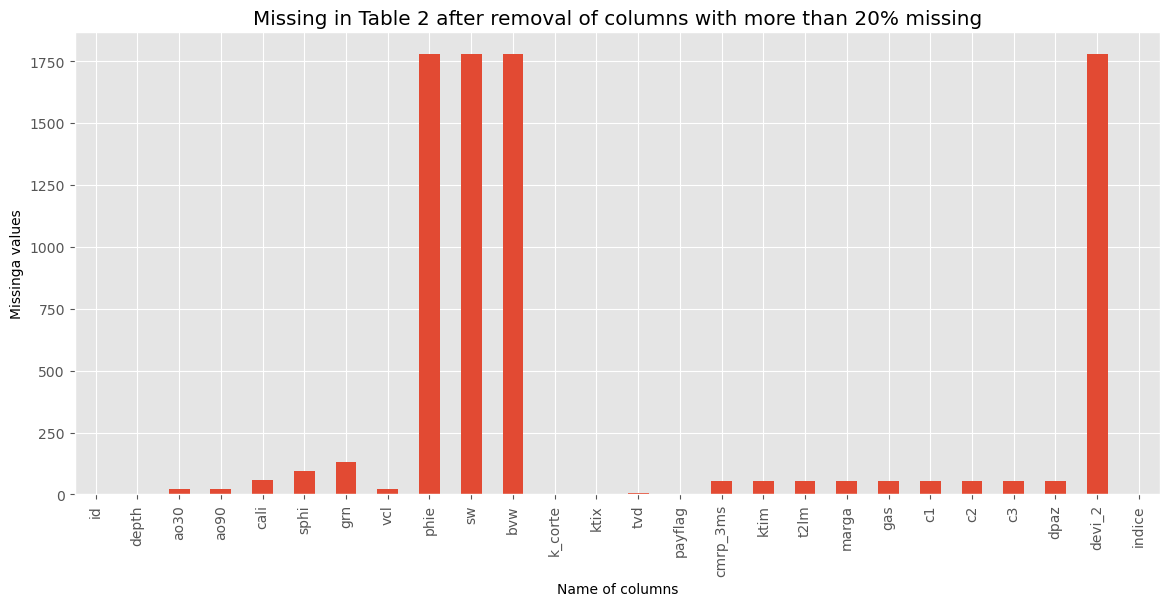

In [64]:
# Table 2 after removal of columns with more than 20%

df_well_2[df_well_2 == -999.25].count().plot(kind='bar', rot= 90, title='Missing in Table 2 after removal of columns with more than 20% missing', ylabel='Missinga values' , xlabel='Name of columns', figsize=(14, 6))

Up to this point, 87 columns have been removed with more than 20% of rows with a value of -999.25 in table 2, which is indicative of the absence of data to be able to apply the classification algorithms.

In [65]:
df_well_2.shape

(12255, 26)

In [66]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'payflag', 'grn', 'indice'],
      dtype='object')

In [67]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'indice'],
      dtype='object')

## Review of the existence of atypical values or outliers <a name="outliers"></a>

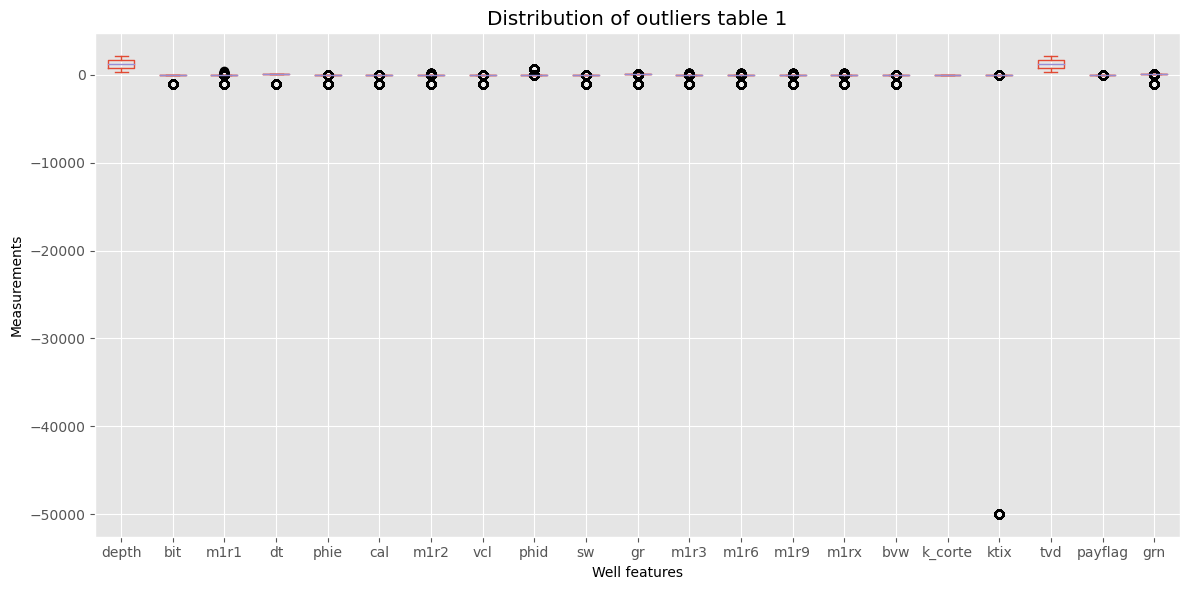

In [68]:
#Exploring the data in Table 1 for check the presence of outliers values

plt.style.use('ggplot')

ax = df_well_1[['depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'payflag', 'grn']].plot(kind='box', title='boxplot', figsize = (12, 6))
plt.title('Distribution of outliers table 1')
plt.xlabel('Well features')
plt.ylabel('Measurements')
plt.tight_layout()
plt.show()

As can be seen from the previous graph in Table 1, there are some outliers mainly in column c2 and in ktix.

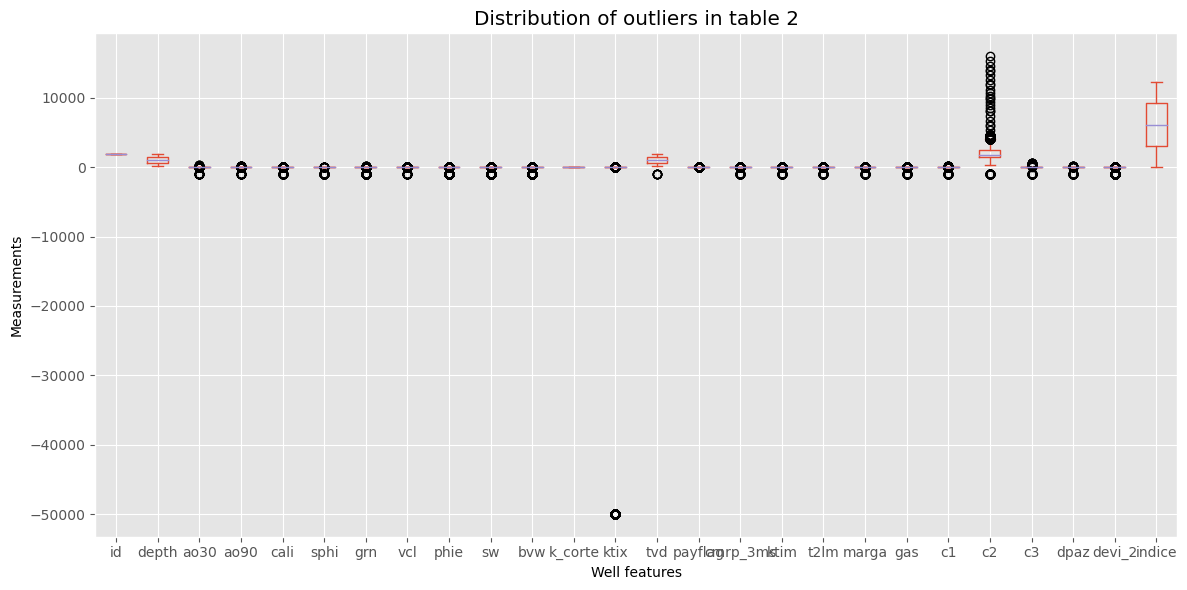

In [69]:
#Exploring the data  in Table 2 for check the presence of outliers values

plt.style.use('ggplot')

ax = df_well_2[['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'indice']].plot(kind='box', title='boxplot', figsize = (12, 6))
plt.title('Distribution of outliers in table 2')
plt.xlabel('Well features')
plt.ylabel('Measurements')
plt.tight_layout()
plt.show()

As can be seen from the previous graph in Table 2, there are some outliers mainly in column c2 and in ktix.

### Treatment outliers values 

### Table 1

In [70]:
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,payflag,grn,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,2.3390,0.7043,626.05,...,2.6667,2.7620,2.8302,0.0096,0.1,0.0000,272.9870,0,75.1565,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,2.3276,0.7086,626.05,...,2.6517,2.7453,2.8132,0.0089,0.1,0.0000,273.0632,0,74.5693,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,2.3492,0.7029,626.05,...,2.6739,2.7669,2.8353,0.0099,0.1,0.0000,273.1394,0,74.1231,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,2.3772,0.6956,626.05,...,2.7027,2.7952,2.8643,0.0112,0.1,0.0001,273.2156,0,73.8060,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,2.3826,0.6953,626.05,...,2.7053,2.7962,2.8654,0.0113,0.1,0.0001,273.2918,0,73.7377,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.6639,0,-999.2500,24285
24286,1869,2123.5932,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.7401,0,-999.2500,24286
24287,1869,2123.6694,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8163,0,-999.2500,24287
24288,1869,2123.7456,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8925,0,-999.2500,24288


In [71]:
def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR 
    maximum = third_q + IQR 
    mean = X[feature].mean()    
    X.loc[X[feature] < minimum, feature] = mean
    X.loc[X[feature] > maximum, feature] = mean

In [72]:
#X = df_well_1.drop(columns =['depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
 #      'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
 #      'ktix', 'tvd', 'payflag', 'grn'])

In [73]:
#for i in range(len(X.columns)):    
#    remove_outlier(X.columns[i])   

In [74]:
#df_well_1 = X
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,payflag,grn,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,2.3390,0.7043,626.05,...,2.6667,2.7620,2.8302,0.0096,0.1,0.0000,272.9870,0,75.1565,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,2.3276,0.7086,626.05,...,2.6517,2.7453,2.8132,0.0089,0.1,0.0000,273.0632,0,74.5693,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,2.3492,0.7029,626.05,...,2.6739,2.7669,2.8353,0.0099,0.1,0.0000,273.1394,0,74.1231,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,2.3772,0.6956,626.05,...,2.7027,2.7952,2.8643,0.0112,0.1,0.0001,273.2156,0,73.8060,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,2.3826,0.6953,626.05,...,2.7053,2.7962,2.8654,0.0113,0.1,0.0001,273.2918,0,73.7377,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.6639,0,-999.2500,24285
24286,1869,2123.5932,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.7401,0,-999.2500,24286
24287,1869,2123.6694,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8163,0,-999.2500,24287
24288,1869,2123.7456,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8925,0,-999.2500,24288


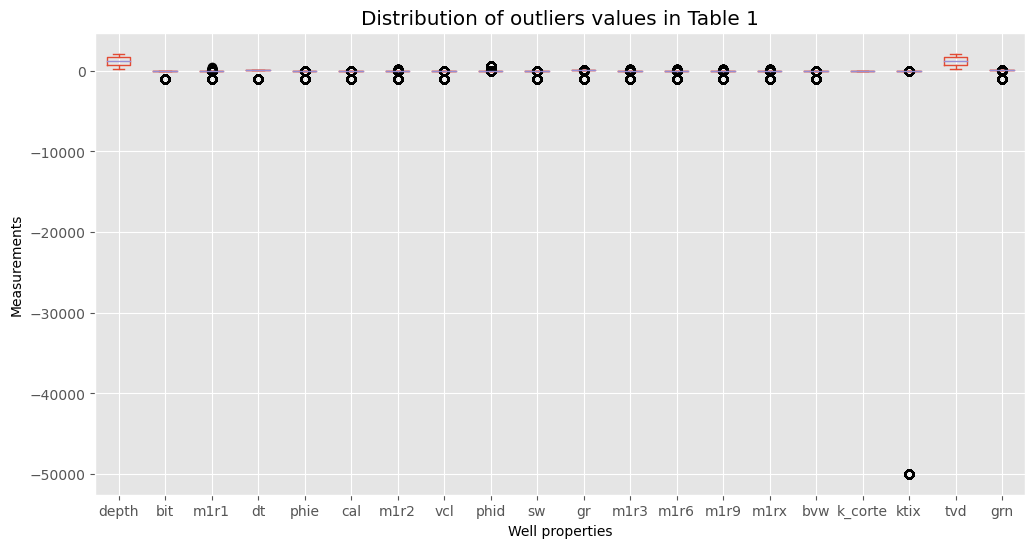

In [75]:
#After treatment of the outliers, verification of the remaining values.

plt.style.use('ggplot')

# Plot the dataframe
ax = df_well_1[['depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'grn']].plot(kind='box', title='boxplot', figsize = (12, 6))
ax.set_title('Distribution of outliers values in Table 1')
ax.set_xlabel('Well properties')
ax.set_ylabel('Measurements')
plt.show()

In [76]:
df_well_1['ktix'].min()

-49950.0

Note that the extreme value in the KTIX column for well 1 is -49950.0

### Table 2

In [77]:
df_well_2

,id,depth,ao30,ao90,cali,sphi,grn,vcl,phie,sw,...,ktim,t2lm,marga,gas,c1,c2,c3,dpaz,devi_2,indice
0,1891,109.0856,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0
1,1891,109.2380,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
2,1891,109.3904,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2
3,1891,109.5428,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,3
4,1891,109.6952,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,1891,1975.9856,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12250
12251,1891,1976.1380,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12251
12252,1891,1976.2904,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12252
12253,1891,1976.4428,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12253


In [78]:
#X = df_well_2.drop(columns =['depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
#       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
#       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2'])

In [79]:
#for i in range(len(X.columns)):    
 #   remove_outlier(X.columns[i])   

In [80]:
#df_well_2 = X
df_well_2

,id,depth,ao30,ao90,cali,sphi,grn,vcl,phie,sw,...,ktim,t2lm,marga,gas,c1,c2,c3,dpaz,devi_2,indice
0,1891,109.0856,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,0
1,1891,109.2380,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,1
2,1891,109.3904,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,2
3,1891,109.5428,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,3
4,1891,109.6952,-999.25,-999.25,-999.2500,-999.25,-999.2500,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,1891,1975.9856,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12250
12251,1891,1976.1380,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12251
12252,1891,1976.2904,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12252
12253,1891,1976.4428,-999.25,-999.25,8.4598,-999.25,60.6602,-999.25,-999.25,-999.25,...,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,-999.25,12253


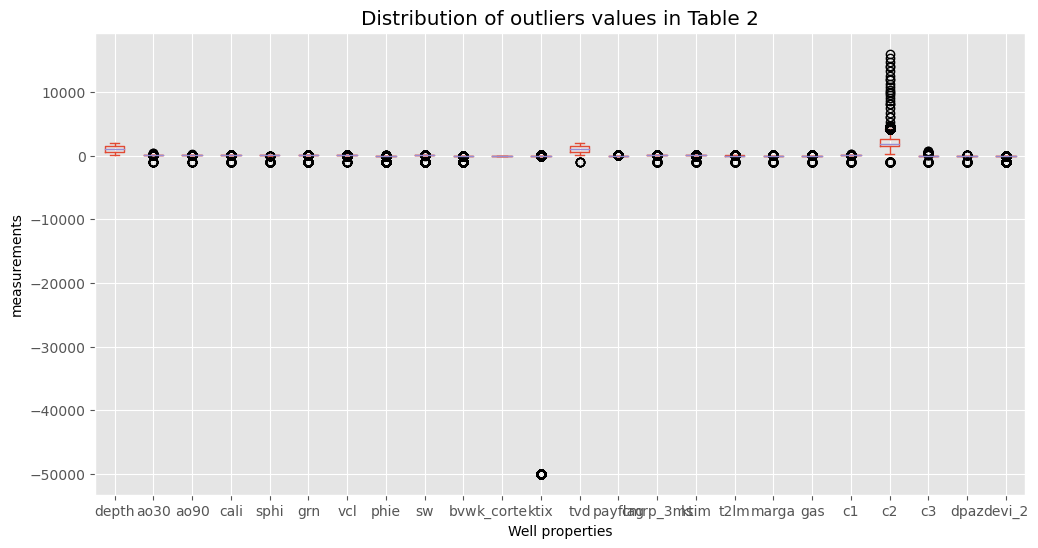

In [81]:
# After treatment of the outliers, verification of the remaining values.

plt.style.use('ggplot')

# Plot the dataframe
ax = df_well_2[['depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'payflag', 'cmrp_3ms', 'ktim',
       't2lm', 'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2']].plot(kind='box', title='boxplot', figsize = (12, 6))
ax.set_title('Distribution of outliers values in Table 2')
ax.set_xlabel('Well properties')
ax.set_ylabel('measurements')
plt.show()

In [82]:
df_well_2['ktix'].min()

-49950.0

In [83]:
df_well_1temp = df_well_1['payflag']

In [84]:
df_well_1temp

0        0
1        0
2        0
3        0
4        0
        ..
24285    0
24286    0
24287    0
24288    0
24289    0
Name: payflag, Length: 24290, dtype: int64

In [85]:
df_well_1 = df_well_1.drop(columns =['payflag'], axis=1)

In [86]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'grn', 'indice'],
      dtype='object')

### Second variant in cleaning outlier values

In [87]:
# Counting outliers Table 1

def remove_outlier(feature):  
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    mean = X[feature].mean()
    print( 'media:', mean)
    """
    # any value beyond the acceptance range are considered
    as outliers.
    # we replace the outliers with the mean value of that
    feature.
    """
    #if(X.loc[X[feature] < minimum]):
    X.loc[X[feature] < minimum, feature] = mean
    print( 'minimum',minimum)
     #   cantidad_registros_outliers +=1
    #if X[feature] > maximum:
    X.loc[X[feature] > maximum, feature] = mean
      #  cantidad_registros_outliers +=1
    print( 'maximum',maximum)
    print("Cantidad",len(X.columns))    
    
    changed = round((X[X[feature] == mean].shape[0] / X.shape[0]) * 100, 2) 
     

# taking all the columns except the last one
# last column is the label
    return changed

In [88]:
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,m1r3,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,grn,indice
0,1869,273.0000,-999.25,2.1316,116.3807,0.0096,-999.25,2.3390,0.7043,626.05,...,2.5147,2.6667,2.7620,2.8302,0.0096,0.1,0.0000,272.9870,75.1565,0
1,1869,273.0762,-999.25,2.1281,116.5120,0.0089,-999.25,2.3276,0.7086,626.05,...,2.4998,2.6517,2.7453,2.8132,0.0089,0.1,0.0000,273.0632,74.5693,1
2,1869,273.1524,-999.25,2.1526,116.6597,0.0099,-999.25,2.3492,0.7029,626.05,...,2.5204,2.6739,2.7669,2.8353,0.0099,0.1,0.0000,273.1394,74.1231,2
3,1869,273.2286,-999.25,2.1823,116.7646,0.0112,-999.25,2.3772,0.6956,626.05,...,2.5476,2.7027,2.7952,2.8643,0.0112,0.1,0.0001,273.2156,73.8060,3
4,1869,273.3048,-999.25,2.1922,117.0662,0.0113,-999.25,2.3826,0.6953,626.05,...,2.5505,2.7053,2.7962,2.8654,0.0113,0.1,0.0001,273.2918,73.7377,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.6639,-999.2500,24285
24286,1869,2123.5932,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.7401,-999.2500,24286
24287,1869,2123.6694,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8163,-999.2500,24287
24288,1869,2123.7456,6.75,-999.2500,-999.2500,-999.2500,-999.25,-999.2500,-999.2500,626.05,...,-999.2500,-999.2500,-999.2500,-999.2500,-999.2500,0.1,-49950.0000,2102.8925,-999.2500,24288


In [89]:
percentage_outliers = {}
cantidad_registros_outliers = 0

In [90]:
X = df_well_1.iloc[:, :-1]
for i in range(len(X.columns)):
    percentage_outliers[X.columns[i]] = remove_outlier(X.columns[i])

media: 1869.0
minimum 1869.0
maximum 1869.0
Cantidad 21
media: 1198.4109
minimum -652.4108999999995
maximum 3049.2326999999996
Cantidad 21
media: -164.71315356113627
minimum 6.75
maximum 6.75
Cantidad 21
media: -5.188658242074929
minimum -1.3873500000000005
maximum 8.16385
Cantidad 21
media: 69.80150468505558
minimum 35.788587499999984
maximum 148.5608875
Cantidad 21
media: -24.255817184026345
minimum -0.029312500000000005
maximum 0.0493875
Cantidad 21
media: -165.7463445491972
minimum 6.4497
maximum 6.7545
Cantidad 21
media: -5.614187295183203
minimum -0.9937750000000016
maximum 7.5736250000000025
Cantidad 21
media: -9.380791066282422
minimum 0.35810000000000003
maximum 1.1205
Cantidad 21
media: 108.08630930012352
minimum -0.11389999999999999
maximum 0.36369999999999997
Cantidad 21
media: -23.333036109510086
minimum 1.0
maximum 1.0
Cantidad 21
media: 43.86218768217373
minimum 46.48939999999999
maximum 91.94040000000001
Cantidad 21
media: -5.750436253602305
minimum -0.7751625
maximum 7

In [91]:
print(percentage_outliers) 

{'id': 100.0, 'depth': 0.0, 'bit': 17.04, 'm1r1': 9.29, 'dt': 2.11, 'phie': 16.68, 'cal': 23.82, 'm1r2': 9.46, 'vcl': 10.1, 'phid': 18.13, 'sw': 12.11, 'gr': 9.44, 'm1r3': 9.61, 'm1r6': 9.87, 'm1r9': 10.0, 'm1rx': 10.21, 'bvw': 11.18, 'k_corte': 0.0, 'ktix': 24.6, 'tvd': 0.0, 'grn': 9.15}


In [92]:
# Calculating the percentage of outliers

cant_out = (100*cantidad_registros_outliers)/5905
print( 'Amount in percent:', cant_out)

Amount in percent: 0.0


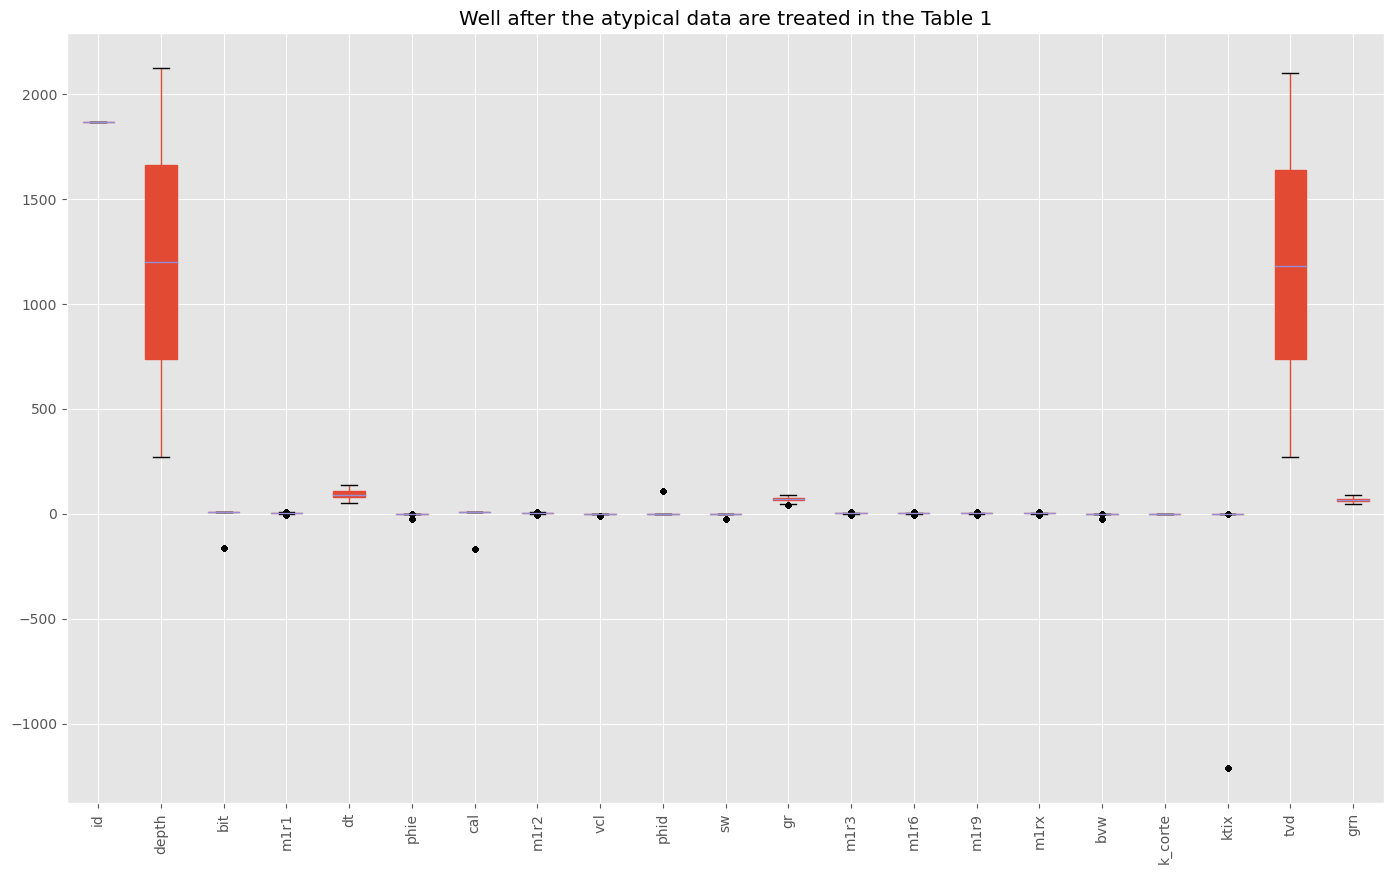

In [93]:
plt.subplots(figsize=(17,10))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)    
plt.title("Well after the atypical data are treated in the Table 1")
plt.show()

In [94]:
df_well_1 = X
df_well_1

,id,depth,bit,m1r1,dt,phie,cal,m1r2,vcl,phid,...,gr,m1r3,m1r6,m1r9,m1rx,bvw,k_corte,ktix,tvd,grn
0,1869,273.0000,-164.713154,2.131600,116.380700,0.009600,-165.746345,2.339000,0.704300,108.086309,...,77.471700,2.514700,2.666700,2.7620,2.830200,0.009600,0.1,0.000000,272.9870,75.156500
1,1869,273.0762,-164.713154,2.128100,116.512000,0.008900,-165.746345,2.327600,0.708600,108.086309,...,76.884500,2.499800,2.651700,2.7453,2.813200,0.008900,0.1,0.000000,273.0632,74.569300
2,1869,273.1524,-164.713154,2.152600,116.659700,0.009900,-165.746345,2.349200,0.702900,108.086309,...,76.438300,2.520400,2.673900,2.7669,2.835300,0.009900,0.1,0.000000,273.1394,74.123100
3,1869,273.2286,-164.713154,2.182300,116.764600,0.011200,-165.746345,2.377200,0.695600,108.086309,...,76.121200,2.547600,2.702700,2.7952,2.864300,0.011200,0.1,0.000100,273.2156,73.806000
4,1869,273.3048,-164.713154,2.192200,117.066200,0.011300,-165.746345,2.382600,0.695300,108.086309,...,76.052900,2.550500,2.705300,2.7962,2.865400,0.011300,0.1,0.000100,273.2918,73.737700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,1869,2123.5170,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.6639,50.974842
24286,1869,2123.5932,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.7401,50.974842
24287,1869,2123.6694,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.8163,50.974842
24288,1869,2123.7456,6.750000,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,...,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,0.1,-1213.268159,2102.8925,50.974842


In [95]:
df_well_1['ktix'].min()

-1213.2681587443394

In [96]:
df_well_1['payflag'] = df_well_1temp

In [97]:
df_well_1['payflag'].unique()

array([0, 1], dtype=int64)

Now notice that the extreme value in the KTIX column for well 1 is -1213.26

In [98]:
df_well_2temp = df_well_2['payflag']

In [99]:
df_well_2 = df_well_2.drop(columns =['payflag'], axis=1)

In [100]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm',
       'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'indice'],
      dtype='object')

In [101]:
# Counting outliers Table 2

def remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR # the acceptable minimum value
    maximum = third_q + IQR # the acceptable maximum value
    mean = X[feature].mean()
    print( 'media:', mean)
    """
    # any value beyond the acceptance range are considered
    as outliers.
    # we replace the outliers with the mean value of that
    feature.
    """
    #if(X.loc[X[feature] < minimum]):
    X.loc[X[feature] < minimum, feature] = mean
    print( 'minimum',minimum)
     #   cantidad_registros_outliers +=1
    #if X[feature] > maximum:
    X.loc[X[feature] > maximum, feature] = mean
      #  cantidad_registros_outliers +=1
    print( 'maximum',maximum)
    print("Cantidad",len(X.columns))    
    
    changed = round((X[X[feature] == mean].shape[0] / X.shape[0]) * 100, 2) 
     

# taking all the columns except the last one
# last column is the label
    return changed

In [102]:
# For table  2
percentage_outliers = {}
cantidad_registros_outliers = 0

In [103]:
X = df_well_2.iloc[:, :-1]
for i in range(len(X.columns)):
    percentage_outliers[X.columns[i]] = remove_outlier(X.columns[i])

media: 1891.0
minimum 1891.0
maximum 1891.0
Cantidad 24
media: 1042.8404
minimum -824.6692
maximum 2910.35
Cantidad 24
media: 3.1817935944512445
minimum -1.6057250000000005
maximum 8.503675000000001
Cantidad 24
media: 3.095323476132191
minimum -0.7615749999999997
maximum 7.976624999999999
Cantidad 24
media: 4.715157837617299
minimum 7.800125000000001
maximum 9.798324999999998
Cantidad 24
media: -7.502605450836393
minimum -0.006874999999999992
maximum 0.502525
Cantidad 24
media: 56.305499102407175
minimum 39.186375000000005
maximum 97.72337499999998
Cantidad 24
media: -1.2356083720930233
minimum 0.23217499999999996
maximum 1.103175
Cantidad 24
media: -144.86835422276621
minimum -0.061700000000000005
maximum 0.10389999999999999
Cantidad 24
media: -144.08425139126888
minimum 0.5803750000000001
maximum 1.2517749999999999
Cantidad 24
media: -144.87190939208486
minimum -0.05105000000000001
maximum 0.08615
Cantidad 24
media: 0.10000000000000002
minimum 0.1
maximum 0.1
Cantidad 24
media: -7242

In [104]:
print(percentage_outliers) 

{'id': 100.0, 'depth': 0.01, 'ao30': 7.66, 'ao90': 8.31, 'cali': 21.53, 'sphi': 0.91, 'grn': 4.5, 'vcl': 6.37, 'phie': 18.48, 'sw': 19.05, 'bvw': 18.86, 'k_corte': 0.0, 'ktix': 33.42, 'tvd': 0.05, 'cmrp_3ms': 8.3, 'ktim': 16.39, 't2lm': 14.3, 'marga': 1.53, 'gas': 2.82, 'c1': 5.12, 'c2': 5.12, 'c3': 0.61, 'dpaz': 0.61, 'devi_2': 28.94}


In [105]:
# Calculating the percentage of outliers

cant_out = (100*cantidad_registros_outliers)/5905
print( 'cant_out en prciento:', cant_out)

cant_out en prciento: 0.0


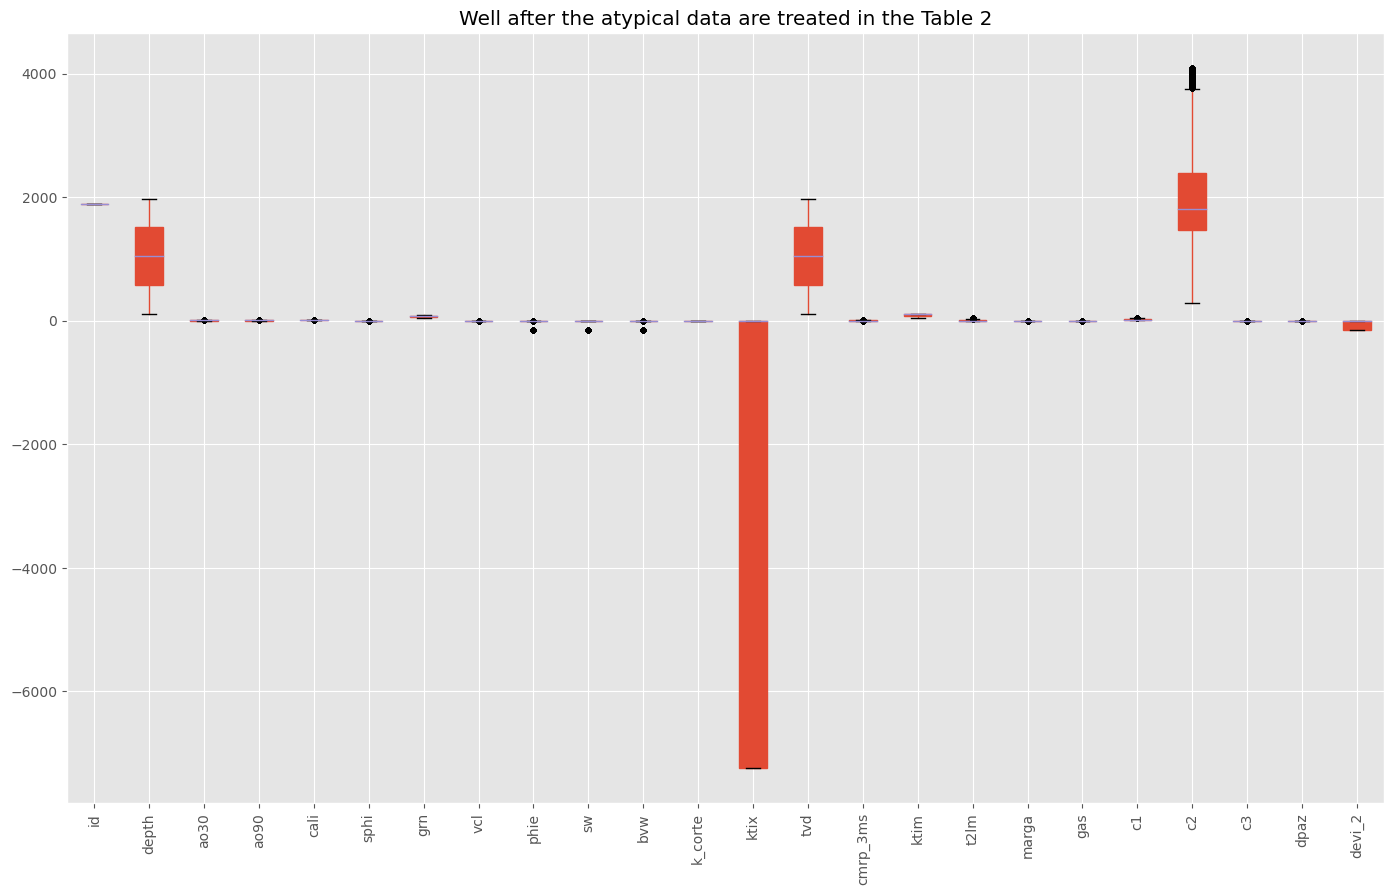

In [106]:
plt.subplots(figsize=(17,10))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)    
plt.title("Well after the atypical data are treated in the Table 2")
plt.show()

In [107]:
df_well_2 = X
df_well_2

,id,depth,ao30,ao90,cali,sphi,grn,vcl,phie,sw,...,cmrp_3ms,ktim,t2lm,marga,gas,c1,c2,c3,dpaz,devi_2
0,1891,109.0856,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
1,1891,109.2380,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
2,1891,109.3904,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
3,1891,109.5428,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
4,1891,109.6952,3.181794,3.095323,4.715158,-7.502605,56.305499,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12250,1891,1975.9856,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
12251,1891,1976.1380,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
12252,1891,1976.2904,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733
12253,1891,1976.4428,3.181794,3.095323,8.459800,-7.502605,60.660200,-1.235608,-144.868354,-144.084251,...,-1.421945,77.934476,10.598286,-4.382946,-2.871318,17.714892,2156.527085,-3.953325,-4.443574,-144.889733


In [108]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm',
       'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2'],
      dtype='object')

In [109]:
df_well_2['ktim'].unique()

array([ 77.93447572, 100.        ,  98.5714    ,  97.1429    ,
        95.7143    ,  94.2857    ,  92.8571    ,  91.4286    ,
        90.        ,  88.3333    ,  86.6667    ,  85.        ,
        83.3333    ,  81.6667    ,  80.        ,  78.5714    ,
        77.1429    ,  75.7143    ,  74.2857    ,  72.8571    ,
        71.4286    ,  70.        ,  81.4286    ,  82.8571    ,
        84.2857    ,  85.7143    ,  87.1429    ,  88.5714    ,
        98.3333    ,  96.6667    ,  95.        ,  93.3333    ,
        91.6667    ,  68.5714    ,  61.4286    ,  54.2857    ,
        50.        ,  55.        ,  60.        ,  65.        ,
        64.2857    ,  58.5714    ,  52.8571    ,  51.4286    ,
        55.7143    ,  75.        ,  65.7143    ,  56.6667    ,
        53.3333    ,  57.1429    ,  76.6667    ,  73.3333    ,
        66.6667    ,  63.3333    ,  62.8571    ,  61.6667    ,
        68.3333    ,  71.6667    ,  78.3333    ,  58.3333    ,
        67.1429    ])

In [110]:
df_well_2['ktix'].min()

-7242.832337152184

Note now that the extreme value in the KTIX column for well 2 which was previously -49950.0 has now been reduced to -7242.83

In [111]:
df_well_2['payflag'] = df_well_2temp

In [112]:
df_well_2['payflag'].unique()

array([0, 1], dtype=int64)

### Proceed with features important <a name="features"></a>

[0 0 0 ... 0 0 0]


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

Predicted labels [0 0 0 ... 0 0 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


importance: 15    0.12
4     0.08
9     0.08
8     0.07
7     0.06
2     0.06
6     0.06
1     0.05
12    0.05
17    0.05
11    0.05
3     0.05
14    0.04
13    0.04
5     0.04
10    0.03
18    0.03
16    0.01
0     0.00
Name: importance, dtype: float64


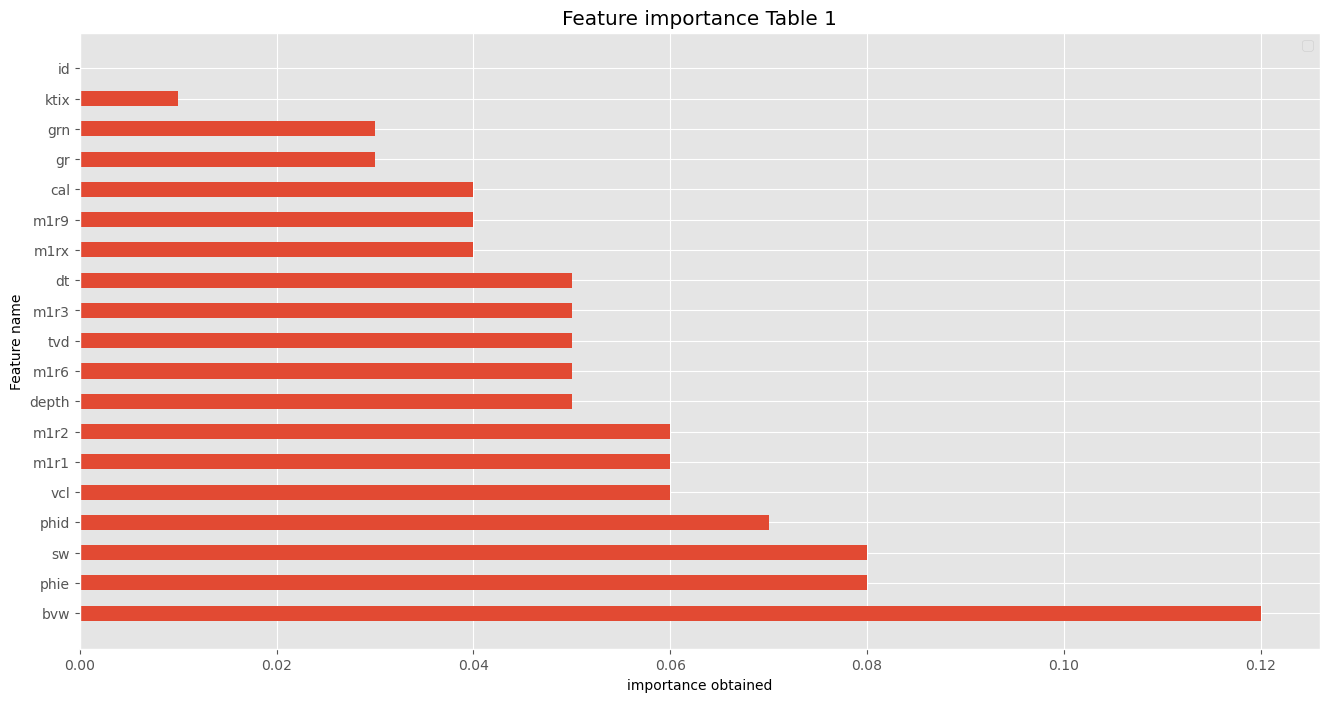

In [280]:
X = df_well_1.drop(['payflag'], axis=1)
y = df_well_1['payflag'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7309, stratify=y, test_size=0.33) 

# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(solver='liblinear')],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, refit=True)

#print("values:", X_test)
#print("Values of y_test:", y_test)

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)

best_model = clf.fit(X_test, y_transformed)

# Fit grid search
model = best_model.best_estimator_

# View best model

y_hat = model.predict(X_test)

classification_report(y_transformed, y_hat)
#plt.show()

# Predict target vector
print('Predicted labels', y_hat)

fr = RandomForestClassifier( 
        bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False
        
        )
#min_impurity_split=None,
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)

fr.fit(X_train, y_train_transformed)
#fr.fit(X_train, y_train)

y_hat = fr.predict(X_test)

df = pd.DataFrame(fr.feature_importances_, X.columns)
df.reset_index(drop=False, inplace=True)
df.columns = ['feature', 'importance']
df.sort_values('importance', inplace=True, ascending=False)

df['indice'] = df.index         
#df['ID'] = value2 
#dataset['ID'].iloc[0].astype(int)

df.to_csv("Features_Importance_Pozo_1_PCA.csv")

fig, axis = plt.subplots(figsize=(16, 8))

#labels = df['importance']

df['importance']= df['importance'].round(decimals = 2)

#N = len(df['importance'])
x = df['feature']
y = df['importance']

print("importance:", y)

bars = axis.barh(x, y, 0.5)
plt.title('Feature importance Table 1')
plt.ylabel('Feature name')
plt.xlabel('importance obtained')
plt.legend(loc='upper right')

### De la tabla 2 

[0 0 0 ... 0 0 0]


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

Predicted labels [0 0 0 ... 0 0 0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


importance: 9     0.23
8     0.09
10    0.09
7     0.08
6     0.06
12    0.05
5     0.05
1     0.05
13    0.05
23    0.04
2     0.03
4     0.03
3     0.03
16    0.03
20    0.02
15    0.02
19    0.02
14    0.02
18    0.00
17    0.00
22    0.00
21    0.00
11    0.00
0     0.00
Name: importance, dtype: float64


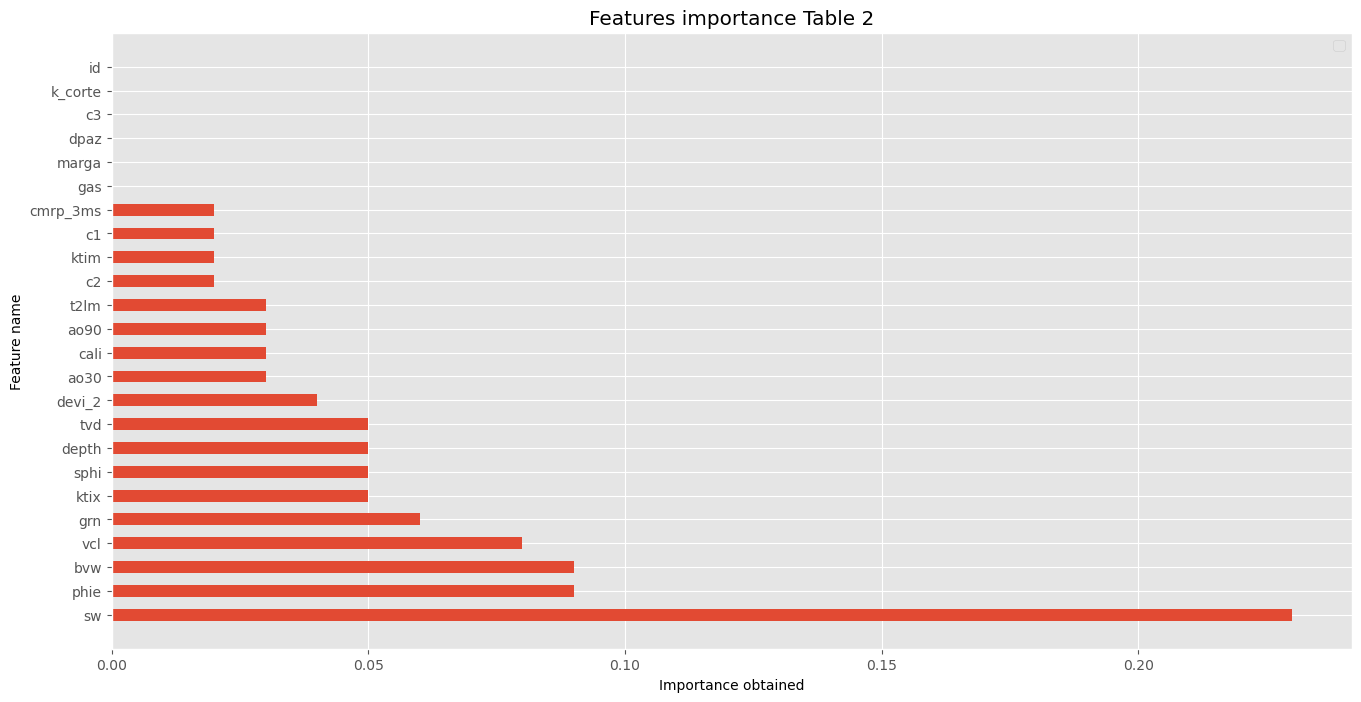

In [115]:
X = df_well_2.drop(['payflag'], axis=1)
y = df_well_2['payflag'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7309, stratify=y, test_size=0.33) 

# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression(solver='liblinear')],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]

# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0, refit=True)

#print("values:", X_test)
#print("Values of y_test:", y_test)

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_test)

#view transformed values
print(y_transformed)

best_model = clf.fit(X_test, y_transformed)

# Fit grid search
model = best_model.best_estimator_

# View best model

y_hat = model.predict(X_test)

classification_report(y_transformed, y_hat)
#plt.show()

# Predict target vector
print('Predicted labels', y_hat)

fr = RandomForestClassifier( 
        bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False
        
        )
#min_impurity_split=None,
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(y_train)

fr.fit(X_train, y_train_transformed)
#fr.fit(X_train, y_train)

y_hat = fr.predict(X_test)

df = pd.DataFrame(fr.feature_importances_, X.columns)
df.reset_index(drop=False, inplace=True)
df.columns = ['feature', 'importance']
df.sort_values('importance', inplace=True, ascending=False)

df['indice'] = df.index         
#df['ID'] = value2 
#dataset['ID'].iloc[0].astype(int)

df.to_csv("Features_Importance_Pozo_2_PCA.csv")

fig, axis = plt.subplots(figsize=(16, 8))

#labels = df['importance']

df['importance']= df['importance'].round(decimals = 2)

#N = len(df['importance'])
x = df['feature']
y = df['importance']

print("importance:", y)

bars = axis.barh(x, y, 0.5)
plt.title('Features importance Table 2')
plt.ylabel('Feature name')
plt.xlabel('Importance obtained')
plt.legend(loc='upper right')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


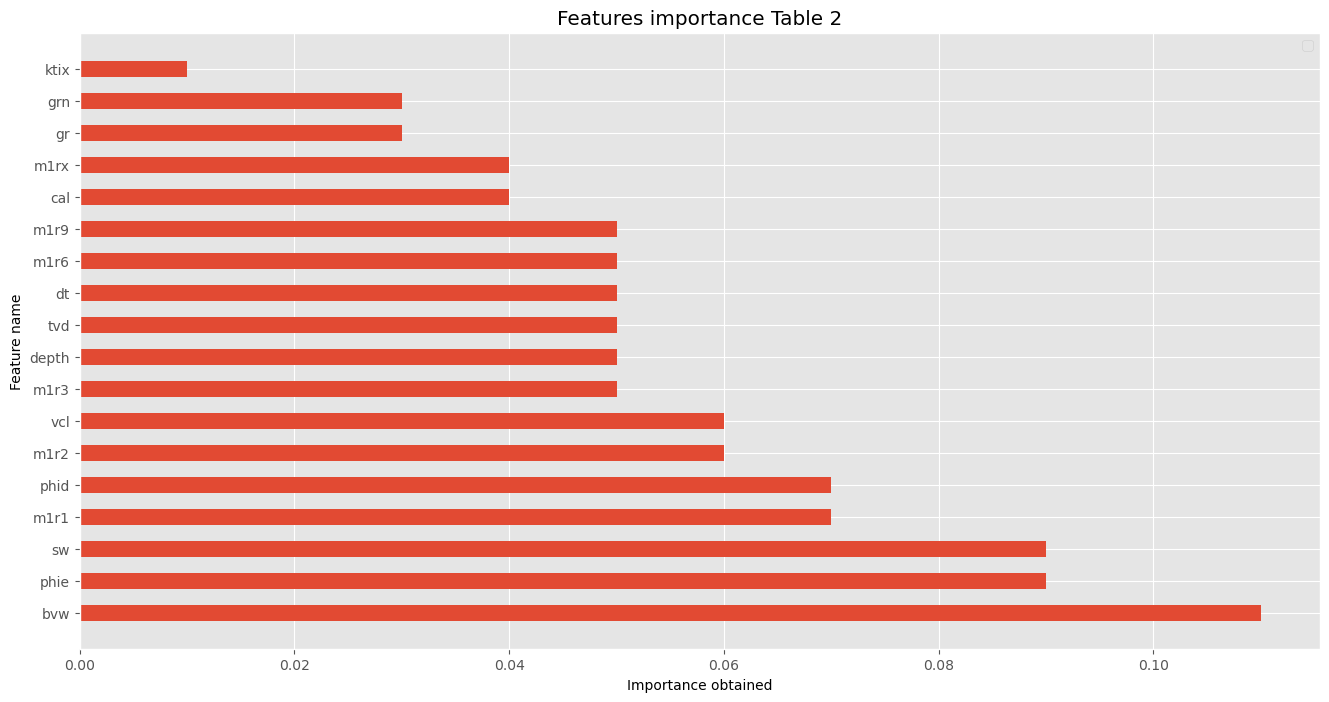

In [278]:
fig, axis = plt.subplots(figsize=(16, 8))

x = df['feature']
y = df['importance']

df['importance']= df['importance'].round(decimals = 2)
bars = axis.barh(x, y, 0.5)
plt.title('Features importance Table 2')
plt.ylabel('Feature name')
plt.xlabel('Importance obtained')
plt.legend(loc='upper right')

'k_corte', 'bit' were eliminated from Table 1 because they do not contribute to explaining the importance of the variables, and in table 2 'k_corte', 'c3', 'dpaz', 'gas', 'marga' were eliminated, which nor do they contribute to the explanation of the variables.

In [117]:
df_well_1.columns

Index(['id', 'depth', 'bit', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl',
       'phid', 'sw', 'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'k_corte',
       'ktix', 'tvd', 'grn', 'payflag'],
      dtype='object')

In [118]:
df_well_1 = df_well_1.drop(['k_corte', 'bit'], axis=1)

In [119]:
listica1 = df_well_1.columns
listica1

Index(['id', 'depth', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl', 'phid', 'sw',
       'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'ktix', 'tvd', 'grn',
       'payflag'],
      dtype='object')

In [120]:
listica1 = listica1.sort_values(ascending=False)

In [121]:
df_well_2.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm',
       'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2', 'payflag'],
      dtype='object')

In [122]:
df_well_2 = df_well_2.drop(['k_corte', 'c3', 'dpaz','gas','marga'], axis=1)

In [123]:
listica2= df_well_2.columns
listica2

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm', 'c1', 'c2',
       'devi_2', 'payflag'],
      dtype='object')

In [124]:
listica2 = listica2.sort_values(ascending=False)

In [125]:
#df_query1 = pd.DataFrame()
df_query1 = pd.DataFrame({'table1': listica1, 
                   'table2': listica2})
df_query1

,table1,table2
0,vcl,vcl
1,tvd,tvd
2,sw,t2lm
3,phie,sw
4,phid,sphi
5,payflag,phie
6,m1rx,payflag
7,m1r9,ktix
8,m1r6,ktim
9,m1r3,id


## Reviewing correlations between the features for each table <a name="correlations"></a>

## Pearson correlation

In [126]:
df_well_1.drop(['id'], axis=1)

,depth,m1r1,dt,phie,cal,m1r2,vcl,phid,sw,gr,m1r3,m1r6,m1r9,m1rx,bvw,ktix,tvd,grn,payflag
0,273.0000,2.131600,116.380700,0.009600,-165.746345,2.339000,0.704300,108.086309,1.000000,77.471700,2.514700,2.666700,2.7620,2.830200,0.009600,0.000000,272.9870,75.156500,0
1,273.0762,2.128100,116.512000,0.008900,-165.746345,2.327600,0.708600,108.086309,1.000000,76.884500,2.499800,2.651700,2.7453,2.813200,0.008900,0.000000,273.0632,74.569300,0
2,273.1524,2.152600,116.659700,0.009900,-165.746345,2.349200,0.702900,108.086309,1.000000,76.438300,2.520400,2.673900,2.7669,2.835300,0.009900,0.000000,273.1394,74.123100,0
3,273.2286,2.182300,116.764600,0.011200,-165.746345,2.377200,0.695600,108.086309,1.000000,76.121200,2.547600,2.702700,2.7952,2.864300,0.011200,0.000100,273.2156,73.806000,0
4,273.3048,2.192200,117.066200,0.011300,-165.746345,2.382600,0.695300,108.086309,1.000000,76.052900,2.550500,2.705300,2.7962,2.865400,0.011300,0.000100,273.2918,73.737700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24285,2123.5170,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.6639,50.974842,0
24286,2123.5932,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.7401,50.974842,0
24287,2123.6694,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.8163,50.974842,0
24288,2123.7456,-5.188658,69.801505,-24.255817,-165.746345,-5.614187,-9.380791,108.086309,-23.333036,43.862188,-5.750436,-5.759989,-5.7768,-5.739982,-24.258415,-1213.268159,2102.8925,50.974842,0


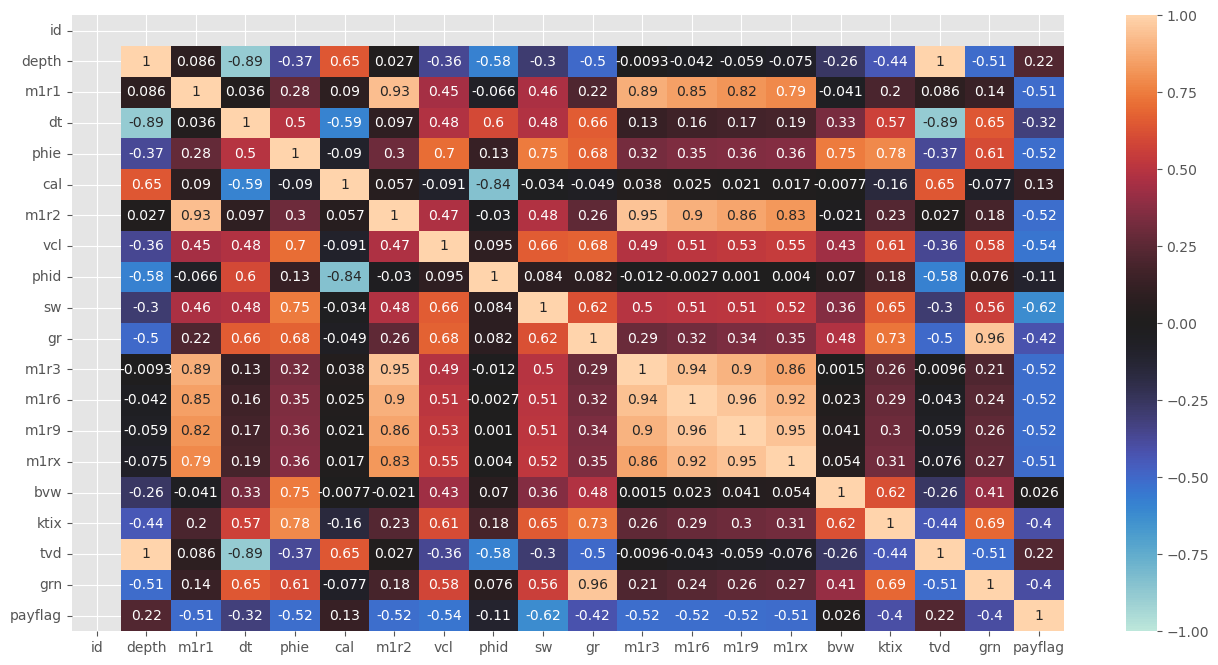

In [127]:
#Correlation matrix/Heatmap for Tabla 1

fig= plt.subplots(figsize=(16,8))  
sns.heatmap(df_well_1.corr() , annot = True, vmin=-1, vmax=1, center= 0)
plt.savefig("Correlation-Matrix-Pearson_Pozo-1.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

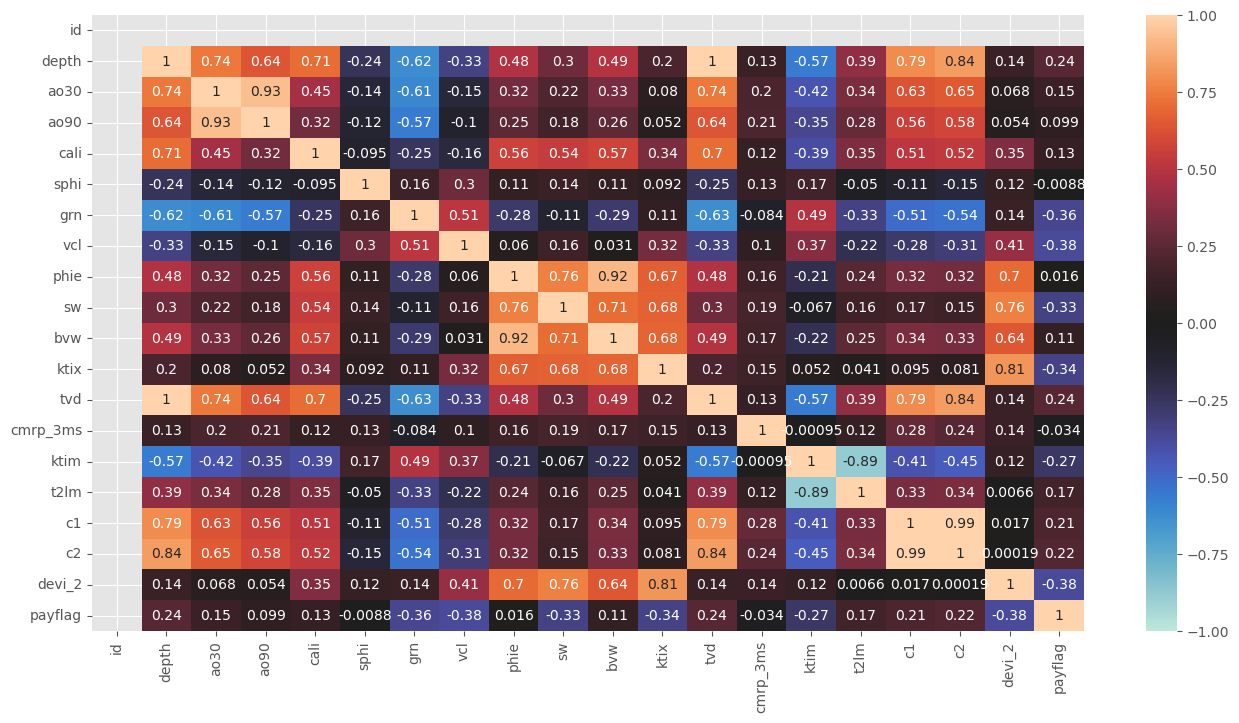

In [128]:
#Correlation matrix/Heatmap for Table 2

fig= plt.subplots(figsize=(16,8))  
sns.heatmap(df_well_2.corr() , annot = True, vmin=-1, vmax=1, center= 0)
plt.savefig("Correlation-Matrix-Pearson_Pozo-2.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

In [129]:
df4=df_well_2.corr()
df4

,id,depth,ao30,ao90,cali,sphi,grn,vcl,phie,sw,bvw,ktix,tvd,cmrp_3ms,ktim,t2lm,c1,c2,devi_2,payflag
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,1.000000,0.737269,0.639635,0.705850,-0.236967,-0.623935,-0.331296,0.480406,0.304446,0.488964,0.200580,0.999267,0.134672,-0.567736,0.393910,0.791901,0.837294,0.139345,0.239408
ao30,NaN,0.737269,1.000000,0.930007,0.453023,-0.142756,-0.607185,-0.148861,0.315028,0.218380,0.328344,0.080386,0.737743,0.200769,-0.424551,0.340437,0.629064,0.653163,0.068163,0.147270
ao90,NaN,0.639635,0.930007,1.000000,0.318259,-0.121435,-0.567828,-0.101524,0.252683,0.176299,0.263014,0.052455,0.639875,0.206350,-0.351774,0.284928,0.559667,0.578896,0.053714,0.099258
cali,NaN,0.705850,0.453023,0.318259,1.000000,-0.094727,-0.251283,-0.156692,0.563771,0.544685,0.571080,0.338387,0.704791,0.122630,-0.392599,0.350588,0.510850,0.524774,0.354625,0.130178
sphi,NaN,-0.236967,-0.142756,-0.121435,-0.094727,1.000000,0.155417,0.301637,0.114800,0.138837,0.111163,0.091962,-0.245957,0.130432,0.171048,-0.049815,-0.108452,-0.146284,0.122435,-0.008843
grn,NaN,-0.623935,-0.607185,-0.567828,-0.251283,0.155417,1.000000,0.514056,-0.281129,-0.113102,-0.285242,0.106672,-0.625400,-0.083680,0.487814,-0.333671,-0.510871,-0.536236,0.137660,-0.355455
vcl,NaN,-0.331296,-0.148861,-0.101524,-0.156692,0.301637,0.514056,1.000000,0.060326,0.158806,0.031010,0.324113,-0.334623,0.100989,0.370668,-0.216177,-0.279897,-0.308747,0.409791,-0.381145
phie,NaN,0.480406,0.315028,0.252683,0.563771,0.114800,-0.281129,0.060326,1.000000,0.762774,0.921013,0.671763,0.479006,0.156434,-0.207231,0.239401,0.322778,0.315765,0.695966,0.015701
sw,NaN,0.304446,0.218380,0.176299,0.544685,0.138837,-0.113102,0.158806,0.762774,1.000000,0.710256,0.679362,0.302956,0.186055,-0.066963,0.156541,0.169237,0.152157,0.760849,-0.333207


In [130]:
# For well 2, the selection criterion is adopted for those coefficients above 0.5

In [131]:
# Well 2

def _findCorrelation_exact(corr, avg, cutoff):

       x = corr.loc[(*[avg.sort_values(ascending=False).index]*2,)]

       if (x.dtypes.values[:, None] == ['int64', 'int32', 'int16', 'int8']).any():
           x = x.astype(float)

       x.values[(*[np.arange(len(x))]*2,)] = np.nan

       deletecol = []
       for ix, i in enumerate(x.columns[:-1]):
           for j in x.columns[ix+1:]:
               if x.loc[i, j] > cutoff:
                   if x[i].mean() > x[j].mean():
                       deletecol.append(i)
                       x.loc[i] = x[i] = np.nan
                   else:
                       deletecol.append(j)
                       x.loc[j] = x[j] = np.nan
       return deletecol
      
acorr = df4.abs()
avg = acorr.mean()

_findCorrelation_exact(acorr, avg, cutoff=0.5)

['tvd',
 'depth',
 'c2',
 'ao30',
 'cali',
 'grn',
 'c1',
 'bvw',
 'sw',
 'devi_2',
 'ktix',
 'ktim']

In [132]:
# Para la tabla 1 

df5=df_well_1.corr()
df5

,id,depth,m1r1,dt,phie,cal,m1r2,vcl,phid,sw,gr,m1r3,m1r6,m1r9,m1rx,bvw,ktix,tvd,grn,payflag
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,NaN,1.000000,0.086111,-0.886489,-0.368137,0.646516,0.027031,-0.362987,-0.582818,-0.296625,-0.502867,-0.009335,-0.042162,-0.058809,-0.075233,-0.258227,-0.441043,0.999977,-0.513453,0.224274
m1r1,NaN,0.086111,1.000000,0.036445,0.278432,0.089850,0.932439,0.447563,-0.066400,0.463675,0.215163,0.890174,0.849189,0.819669,0.785922,-0.041495,0.199806,0.085961,0.136149,-0.509941
dt,NaN,-0.886489,0.036445,1.000000,0.496324,-0.592091,0.096964,0.481724,0.597437,0.479377,0.662901,0.132529,0.161491,0.174874,0.187116,0.334546,0.566765,-0.885760,0.645064,-0.319541
phie,NaN,-0.368137,0.278432,0.496324,1.000000,-0.089864,0.301182,0.703440,0.129211,0.747558,0.676998,0.323833,0.345841,0.358205,0.364063,0.745301,0.782636,-0.368884,0.607092,-0.516221
cal,NaN,0.646516,0.089850,-0.592091,-0.089864,1.000000,0.056800,-0.091227,-0.842131,-0.033862,-0.049124,0.038144,0.025463,0.020902,0.016557,-0.007735,-0.158568,0.645823,-0.077180,0.127758
m1r2,NaN,0.027031,0.932439,0.096964,0.301182,0.056800,1.000000,0.468930,-0.029886,0.481024,0.261962,0.948574,0.898153,0.864097,0.825828,-0.021206,0.232552,0.026888,0.182914,-0.521251
vcl,NaN,-0.362987,0.447563,0.481724,0.703440,-0.091227,0.468930,1.000000,0.094753,0.659088,0.677735,0.487768,0.511838,0.530829,0.546166,0.433638,0.607345,-0.363736,0.581539,-0.539606
phid,NaN,-0.582818,-0.066400,0.597437,0.129211,-0.842131,-0.029886,0.094753,1.000000,0.083510,0.082214,-0.012055,-0.002672,0.001008,0.004045,0.070079,0.180869,-0.582773,0.076313,-0.108945
sw,NaN,-0.296625,0.463675,0.479377,0.747558,-0.033862,0.481024,0.659088,0.083510,1.000000,0.624728,0.497321,0.507369,0.513297,0.515694,0.360664,0.649820,-0.296814,0.557248,-0.622249


In [133]:
data_query7 = pd.DataFrame()

In [134]:
# Well 1

def _findCorrelation_exact(corr, avg, cutoff):

       x = corr.loc[(*[avg.sort_values(ascending=False).index]*2,)]

       if (x.dtypes.values[:, None] == ['int64', 'int32', 'int16', 'int8']).any():
           x = x.astype(float)

       x.values[(*[np.arange(len(x))]*2,)] = np.nan

       deletecol = []
       for ix, i in enumerate(x.columns[:-1]):
           for j in x.columns[ix+1:]:
               if x.loc[i, j] > cutoff:
                   if x[i].mean() > x[j].mean():
                       deletecol.append(i)
                       x.loc[i] = x[i] = np.nan
                   else:
                       deletecol.append(j)
                       x.loc[j] = x[j] = np.nan
       return deletecol

acorr = df5.abs()
avg = acorr.mean()

data_query7['name_to_delete'] =_findCorrelation_exact(acorr, avg, cutoff=0.5)   

In [135]:
data_query7

,name_to_delete
0,vcl
1,sw
2,gr
3,phie
4,dt
5,ktix
6,m1r9
7,m1r6
8,m1r3
9,m1r2


Ajustando las columas a las obtenidas

In [136]:
# Well 1 

data_query6 = pd.DataFrame()
data_query6['nombres'] = df_well_1.columns

data_query6

,nombres
0,id
1,depth
2,m1r1
3,dt
4,phie
5,cal
6,m1r2
7,vcl
8,phid
9,sw


In [137]:
data_query6['Newcount'] = data_query6['nombres'].map(data_query7['name_to_delete'].value_counts())
data_query6.reset_index()

,index,nombres,Newcount
0,0,id,NaN
1,1,depth,1.0
2,2,m1r1,1.0
3,3,dt,1.0
4,4,phie,1.0
5,5,cal,NaN
6,6,m1r2,1.0
7,7,vcl,1.0
8,8,phid,1.0
9,9,sw,1.0


In [174]:
# Extracting the name of the column to delete
#data_query6[data_query6['Newcount'] != 1.0 ].count(

In [ ]:
#data_query6 = data_query6[data_query6['Newcount'] != 1.0 ]
#data_query6

In [ ]:
#data_query6['nombres']

In [ ]:
#df_well_1 =  df_well_1.drop(['cal', 'm1rx', 'bvw', 'grn'], axis=1)   

In [ ]:
#df_well_1.columns

In [ ]:
# For well 2, the same steps are carried out as for Well 1, that is, 
# removing the columns with less than 0.5 correlation and leaving the rest of the columns

#df_well_2.columns 

In [175]:
#data_query8 = pd.DataFrame()

It was obtained from the previous correlation matrices that there are features with strong correlations, being for well 1: 'vcl', 'sw', 'gr', 'phie', 'dt', 'ktix', 'm1r9', ' m1r6', 'm1r3', 'm1r2', 'payflag', 'm1r1', 'tvd',
  'depth', 'phid', and for well 2: 'tvd', 'depth', 'c2', 'ao30', 'cali', 'grn', 'c1', 'bvw', 'sw', 'devi_2', 'ktix',
  'ktim', respectively

## Conclusion of the data exploration, cleaning and preparation part

The 2 datasets were reviewed and the following problems were found:

1- There is a lot of missing data in certain columns identified with the value -999.25.

2- There are unbalanced data or unbalanced classes, since 94.9% and 94.4% belong to class 0, in well 1 and well 2 respectively, while 5.1% and 5.6% belong to class 1 in well 1 and well 2 respectively.

3- Outliers were found

The actions carried out consisted of:

1- All feature names were converted to lowercase

2- Unnecessary columns were removed with only 1 value as k_cut

3- Outliers were treated to mitigate their effect

4- The missing data were analyzed, finding columns with a high rate of missing data such as ymbritt, prbritt and britt where 24% is missing in well 1, and 'dpap_2', 'dpaz_3', 'dptr_3', 'hazi_3 ' and 'p1az_3' in well 2, where the sustenance amounts to 80% or more in these and other features. The criterion of removing all columns with more than 20% of missing values was adopted.

5- No duplicate rows found

6- There is heterogeneity in the data since the two wells only coincide in 7 columns.

7- An analysis of the value contributed by each column was carried out to establish the most important ones using the Grid Search method, from which those columns with a value contribution of 0 were removed from the data.

8- The Pearson correlation coefficient was applied to establish the level of strength between the variables, establishing the criterion that those with a positive or negative correlation coefficient greater than 0.60 remain in the dataset, otherwise they would be removed.

All of the above actions have resulted in data that is in better conditions to apply the selected machine learning algorithms.

### Review of unbalanced classes

In [ ]:
# Accounting for records for each class to verify the imbalance in Well 1

df_well_1.shape

In [ ]:
df_well_1['payflag'].unique()

In [ ]:
df_well_1['payflag'].value_counts()

In [ ]:
df_well_1['payflag'].value_counts().plot.bar(rot= 0) 
plt.title('Class imbalance in table 1')
plt.ylabel('Number of records per class')
plt.xlabel('Classes')
plt.legend(loc='upper right')
plt.savefig("Chart_unbalance_data_Pozo-1.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

In [173]:
# Accounting for records for each class to verify the imbalance in Well 2

df_well_2.shape

(12255, 20)

In [1539]:
df_well_2['payflag'].value_counts()

payflag
0    11591
1      664
Name: count, dtype: int64

In [1534]:
df_well_2['payflag'].unique()

array([0, 1], dtype=int64)

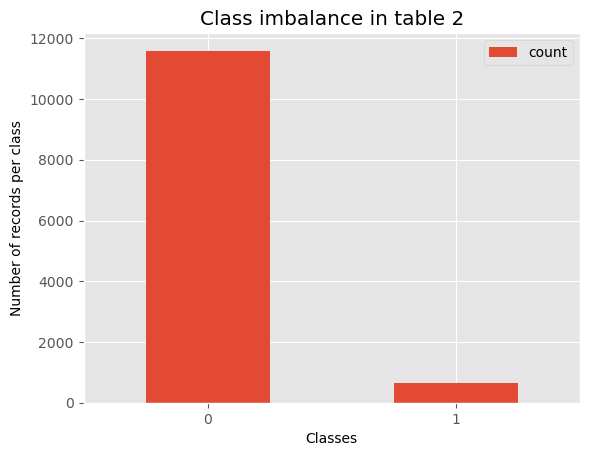

In [83]:
df_well_2['payflag'].value_counts().plot.bar(rot= 0) 
plt.title('Class imbalance in table 2')
plt.ylabel('Number of records per class')
plt.xlabel('Classes')
plt.legend(loc='upper right')
plt.savefig("Chart_unbalance_data_Pozo-2.png", dpi=600, bbox_inches='tight', pad_inches=0.5)

As can be seen in the previous graphs, the marked difference can be seen in the number of records of each class in each of the wells, totaling in class 0 94.9% and 94.4% of the records in well 1 and in the well 2, respectively.

In [1540]:
# Oversampling method is applied
# From the previous situation, a technique is applied to balance the data in order to later apply an algorithm
# regression

## ML Models
### Feature Selection
#### Funtion to evaluate our models

In [160]:
#Indica las graficas y valores de metricas como exactitud, F1, AUC-ROC, PRC
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

### Oversampling

In [142]:
df_well_1.columns

Index(['id', 'depth', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl', 'phid', 'sw',
       'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'ktix', 'tvd', 'grn',
       'payflag'],
      dtype='object')

In [147]:
#Features and target
featuress = ['depth', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl', 'phid', 'sw',
       'gr', 'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'ktix', 'tvd', 'grn']
target = df_well_1['payflag']

In [148]:
features = df_well_1[featuress]

In [149]:
over_sampler = SMOTE(random_state=12345)
features_upsampled,target_upsampled = over_sampler.fit_resample(features,target)

In [152]:
print('Resampled dataset shape %s' % Counter(target_upsampled))

Resampled dataset shape Counter({0: 23060, 1: 23060})


In [153]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.2, random_state=42)

In [154]:
# Scaling features
r_scaler = RobustScaler()

scaled_features_train = r_scaler.fit_transform(features_train)
features_train = pd.DataFrame(scaled_features_train,columns=features_train.columns)

scaled_features_test = r_scaler.fit_transform(features_valid)
features_valid = pd.DataFrame(scaled_features_test,columns=features_valid.columns)

In [155]:
train_data = pd.concat([features_train, target_train], axis=1)

# Matriz de correlación
correlation_matrix = train_data.corr(method='spearman')

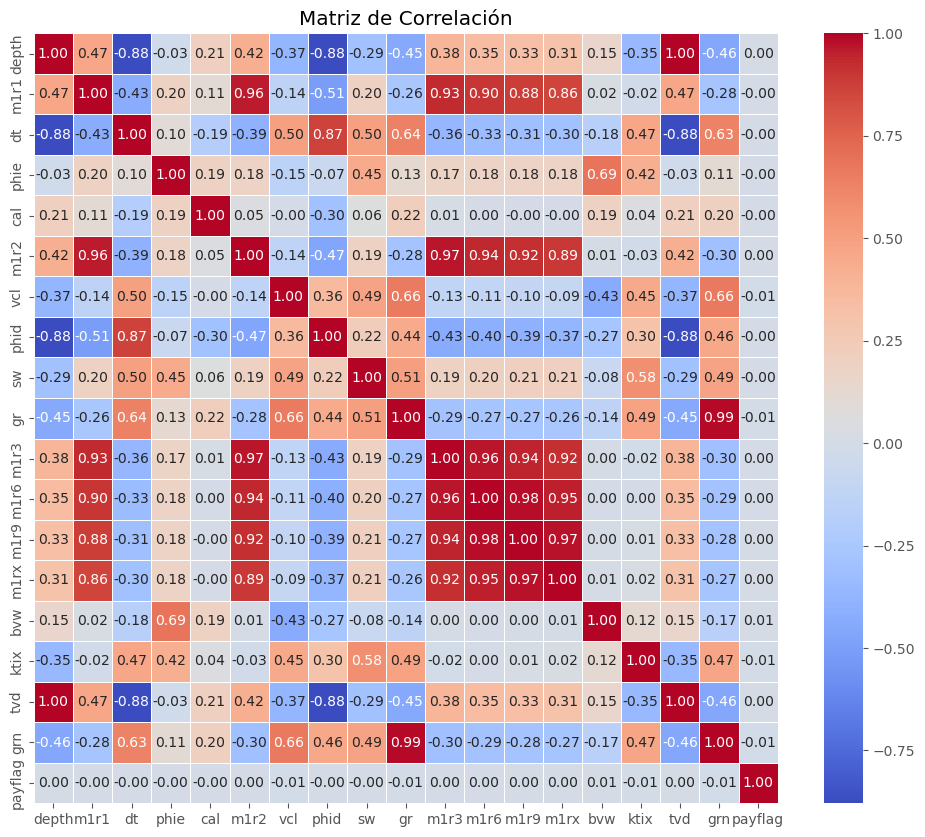

In [156]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Modelo Dummy

           train  test
Exactitud   0.95  0.95
F1          0.00  0.00
APS         0.05  0.05
ROC AUC     0.50  0.50


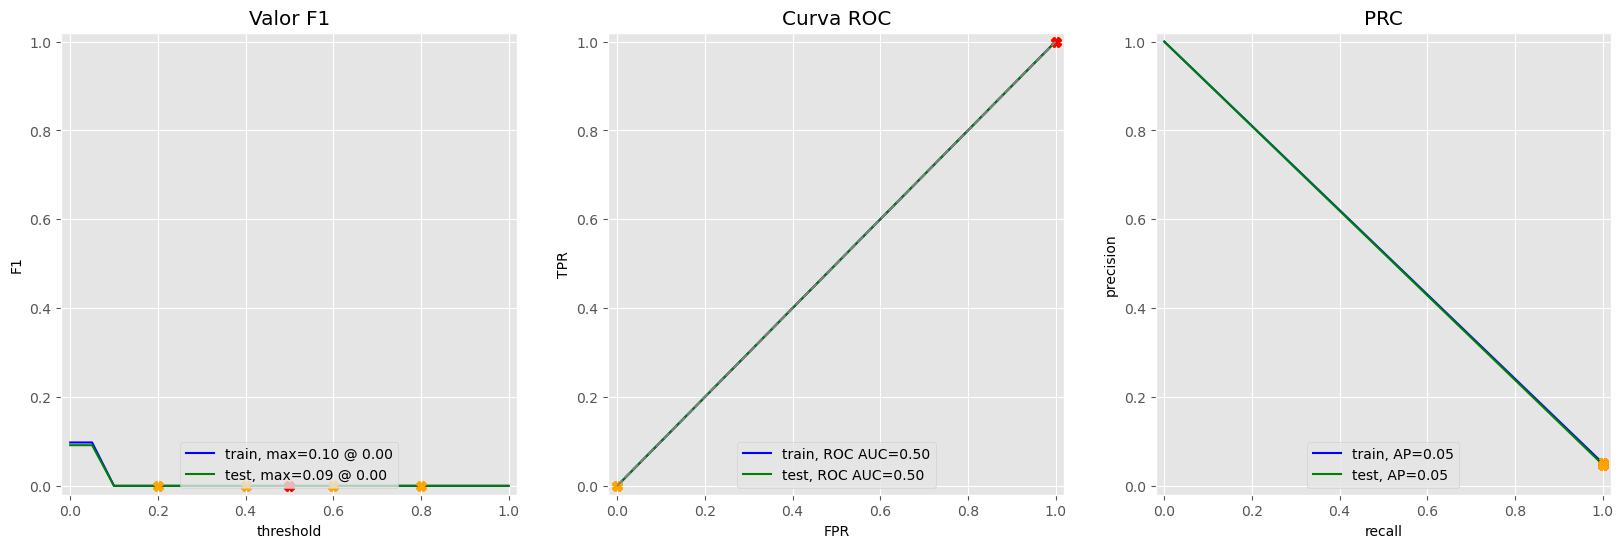

In [161]:
dummy_cl = DummyClassifier(random_state=12345)
dummy_cl.fit(features_train, target_train)
evaluate_model(dummy_cl, features_train, target_train, features_valid, target_valid)

### Regresión Logística

           train  test
Exactitud   0.98  0.89
F1          0.84  0.46
APS         0.88  0.62
ROC AUC     1.00  0.98


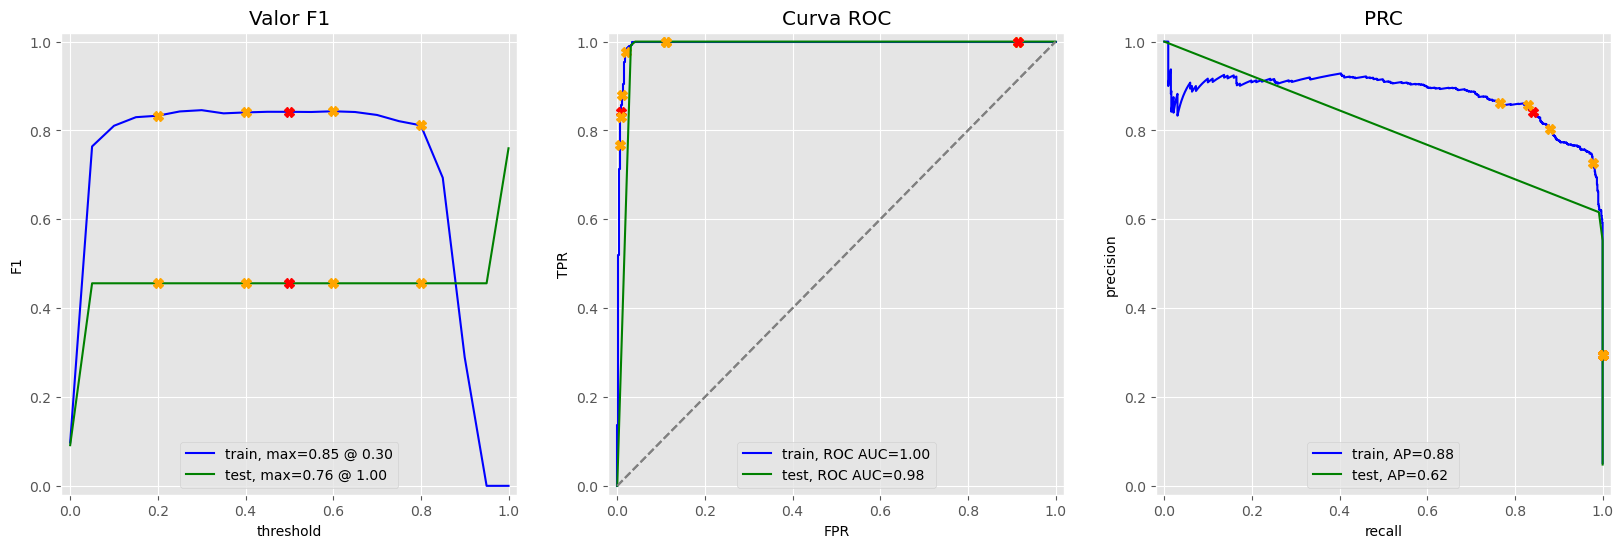

In [162]:
model_lr=LogisticRegression(solver='liblinear', random_state=12345)
model_lr.fit(features_train, target_train)
evaluate_model(model_lr, features_train, target_train, features_valid, target_valid)

In [163]:
score_valid=1
auc_roc_lr=1

### Árbol de decisión

In [164]:
model_tree = DecisionTreeClassifier()
param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth': [10, 20, 50, 100],
    'class_weight':[None, 'balanced'],
    'random_state':[12345]
}
grid_tree = GridSearchCV(estimator=model_tree, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_tree.fit(features_train, target_train)
best_param_tree=grid_tree.best_params_


In [165]:
print(best_param_tree)
print(grid_tree.best_score_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'random_state': 12345}
0.9801597252604219


CPU times: total: 0 ns
Wall time: 0 ns
           train  test
Exactitud   0.99  0.99
F1          0.90  0.87
APS         0.94  0.89
ROC AUC     1.00  0.98


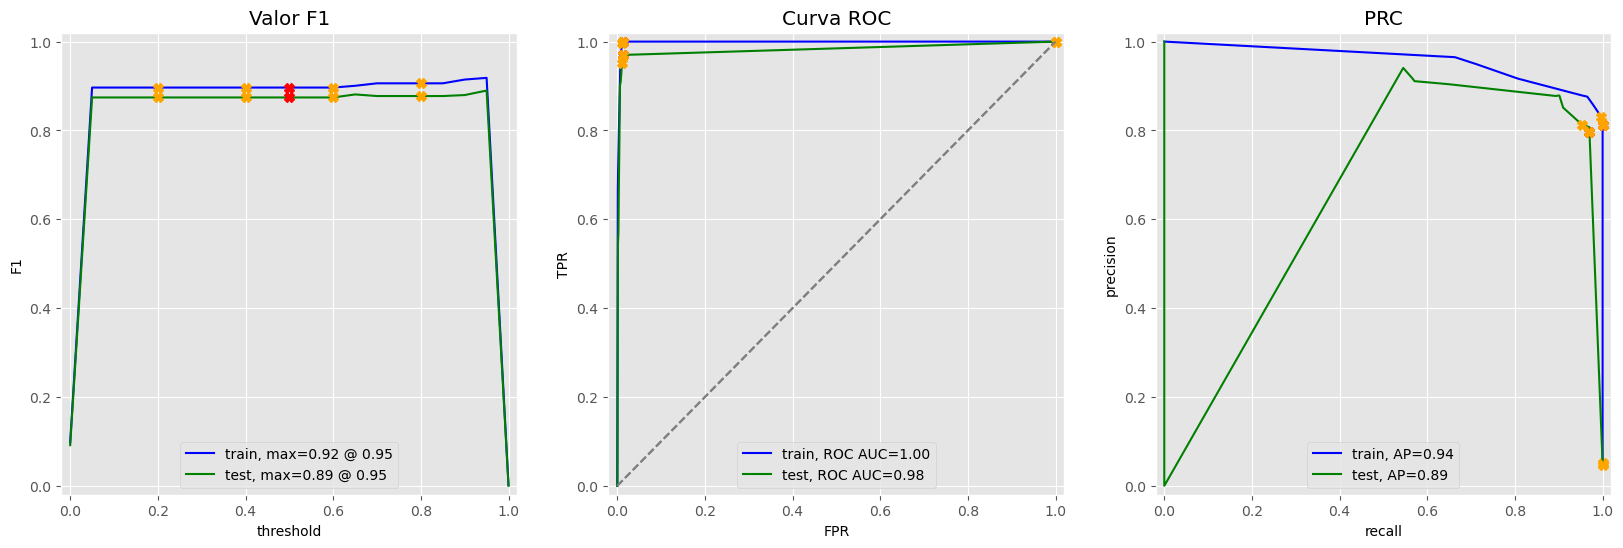

In [166]:
%time #llenar con los resultados anteriores
model_tree = grid_tree.best_estimator_
evaluate_model(model_tree, features_train, target_train, features_valid, target_valid)

In [167]:
accuracy_score_tree=1
auc_roc_tree=1

### Bosque aleatorio

In [168]:
model_forest = RandomForestClassifier()
param_grid = {
    'n_estimators':[20, 50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_depth':[10, 20, 30, 50],
    'class_weight':[None, 'balanced']
}
grid_forest = GridSearchCV(estimator=model_forest, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_forest.fit(features_train, target_train)
best_param_forest=grid_forest.best_params_

In [169]:
print(best_param_forest)
print(grid_forest.best_score_)

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 200}
0.9989292850201645


CPU times: total: 0 ns
Wall time: 0 ns
           train  test
Exactitud    1.0  0.99
F1           1.0  0.93
APS          1.0  0.98
ROC AUC      1.0  1.00


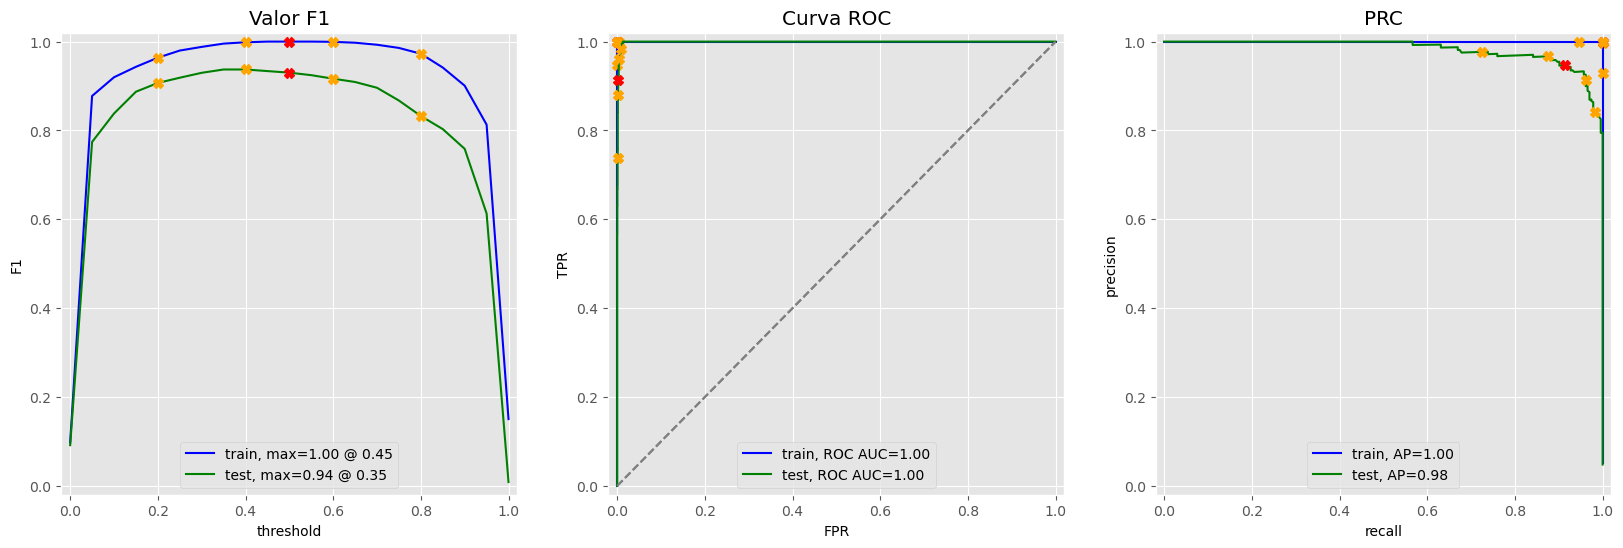

In [170]:
%time #llenar con los resultados anteriores
model_ba = grid_forest.best_estimator_
evaluate_model(model_ba, features_train, target_train, features_valid, target_valid)

In [171]:
score_valid_ba=1
auc_roc_ba=1

## Model Evaluation

In [172]:
# Se realiza un cuadro resumen 

values = [
    ['Logistic Regression', score_valid, auc_roc_lr,0.155],
    ['Decision Tree C', accuracy_score_tree, auc_roc_tree,0.255],
    ['Random Forest C', score_valid_ba, auc_roc_ba,31]]    

resumen_models = pd.DataFrame(values, columns=['Model', 'Exactitud', 'AUC-ROC','Time in minutes'])
resumen_models = resumen_models.set_index('Model')
resumen_models.sort_values(by='AUC-ROC', ascending=False)

,Exactitud,AUC-ROC,Time in minutes
Model,,,
Logistic Regression,1,1,0.155
Decision Tree C,1,1,0.255
Random Forest C,1,1,31.000


In [226]:
classifiers = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]

In [227]:
train_tf = scaled_features_train
y_train = target_train

C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


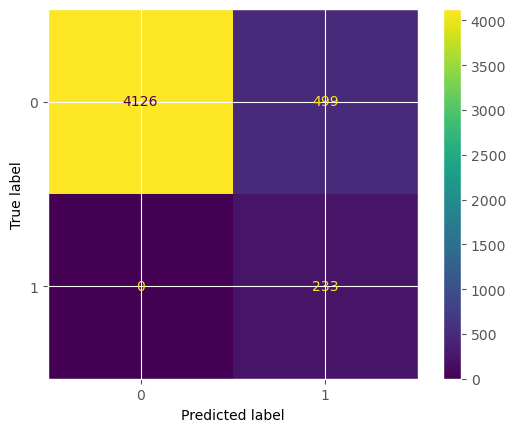

for the LogisticRegression we receive the following values:
Accuracy: 98.204%
Precision score: 82.661%
Recall score: 82.247%
F1 score: 82.453%


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


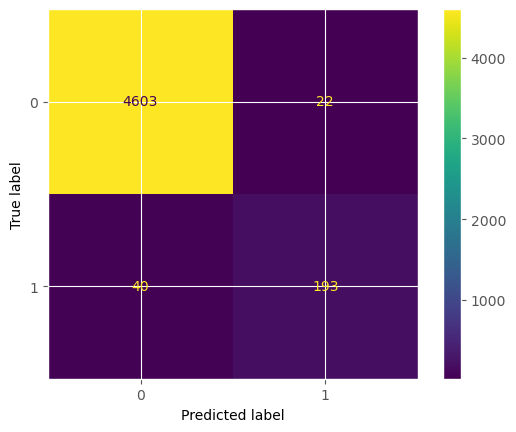

for the DecisionTreeClassifier we receive the following values:
Accuracy: 100.000%
Precision score: 100.000%
Recall score: 100.000%
F1 score: 100.000%


C:\Users\USUARIO\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


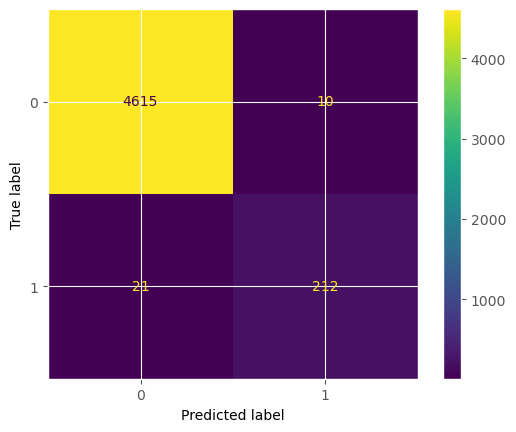

for the RandomForestClassifier we receive the following values:
Accuracy: 100.000%
Precision score: 100.000%
Recall score: 100.000%
F1 score: 100.000%


In [230]:
for clf in classifiers:
    clf.fit(train_tf, y_train)
    name = clf.__class__.__name__
        
    expectation = y_train
    train_prediction = clf.predict(train_tf)
    acc = accuracy_score(expectation, train_prediction)   
    pre = precision_score(expectation, train_prediction)
    rec = recall_score(expectation, train_prediction)
    f1 = f1_score(expectation, train_prediction)    
    predictions = clf.predict(features_valid)
    cm = confusion_matrix(target_valid, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()
    
    print(f"for the {name} we receive the following values:")
    print("Accuracy: {:.3%}".format(acc))
    print('Precision score: {:.3%}'.format(pre))
    print('Recall score: {:.3%}'.format(rec))
    print('F1 score: {:.3%}'.format(f1))

|       Models        | Accuracy | Precision |Recall score |F1 score |
|:-------------------:|:--------:|:---------:|:-----------:|  ------:|
|  Logistic Regression|  98.2    |  86.6     |  82.24      | 82.4    |
|  Decision Tree C    |  100     |  100      |  100        | 100     |
|  Random Forest C    |  100     |  100      |  100        | 100     |


In [237]:
def get_feature_importance(clf, feature_names):
    importances = clf.feature_importances_
    indices_sorted_by_importance = np.argsort(importances)[:: -1]
    return list(zip(
        feature_names[indices_sorted_by_importance],
        importances[indices_sorted_by_importance],
         )
        )

In [239]:
fr = RandomForestClassifier(
        
        bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, #min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False
        
        )

In [242]:
lab = preprocessing.LabelEncoder()
y_train_transformed = lab.fit_transform(target_train)

In [243]:
fr.fit(features_train, y_train_transformed)

RandomForestClassifier(max_features=2, n_estimators=1000)

In [244]:
y_hat = fr.predict(features_valid)

In [249]:
#X = dataset.drop(['PAYFLAG', 'indice'], axis=1)
#X = df_well_1.drop(['PAYFLAG', 'id'], axis=1)
X.columns

Index(['id', 'depth', 'ao30', 'ao90', 'cali', 'sphi', 'grn', 'vcl', 'phie',
       'sw', 'bvw', 'k_corte', 'ktix', 'tvd', 'cmrp_3ms', 'ktim', 't2lm',
       'marga', 'gas', 'c1', 'c2', 'c3', 'dpaz', 'devi_2'],
      dtype='object')

In [253]:
X.columns

Index(['depth', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl', 'phid', 'sw', 'gr',
       'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'ktix', 'tvd', 'grn', 'payflag'],
      dtype='object')

In [260]:
X = df_well_1.drop(['id','payflag'], axis=1)

In [261]:
#X = df_well_1.drop(['payflag'], axis=1)

In [262]:
X.columns

Index(['depth', 'm1r1', 'dt', 'phie', 'cal', 'm1r2', 'vcl', 'phid', 'sw', 'gr',
       'm1r3', 'm1r6', 'm1r9', 'm1rx', 'bvw', 'ktix', 'tvd', 'grn'],
      dtype='object')

In [270]:
df = pd.DataFrame(fr.feature_importances_, X.columns)
df.reset_index(drop=False, inplace=True)
df.columns = ['feature', 'importance']
df.sort_values('importance', inplace=True, ascending=False)

In [273]:
#fig, axis = plt.subplots(figsize=(16, 8))
#df['importance']= df['importance'].round(decimals = 2)

importance: 14    0.11
3     0.09
8     0.09
1     0.07
7     0.07
5     0.06
6     0.06
10    0.05
0     0.05
16    0.05
2     0.05
11    0.05
12    0.05
4     0.04
13    0.04
9     0.03
17    0.03
15    0.01
Name: importance, dtype: float64


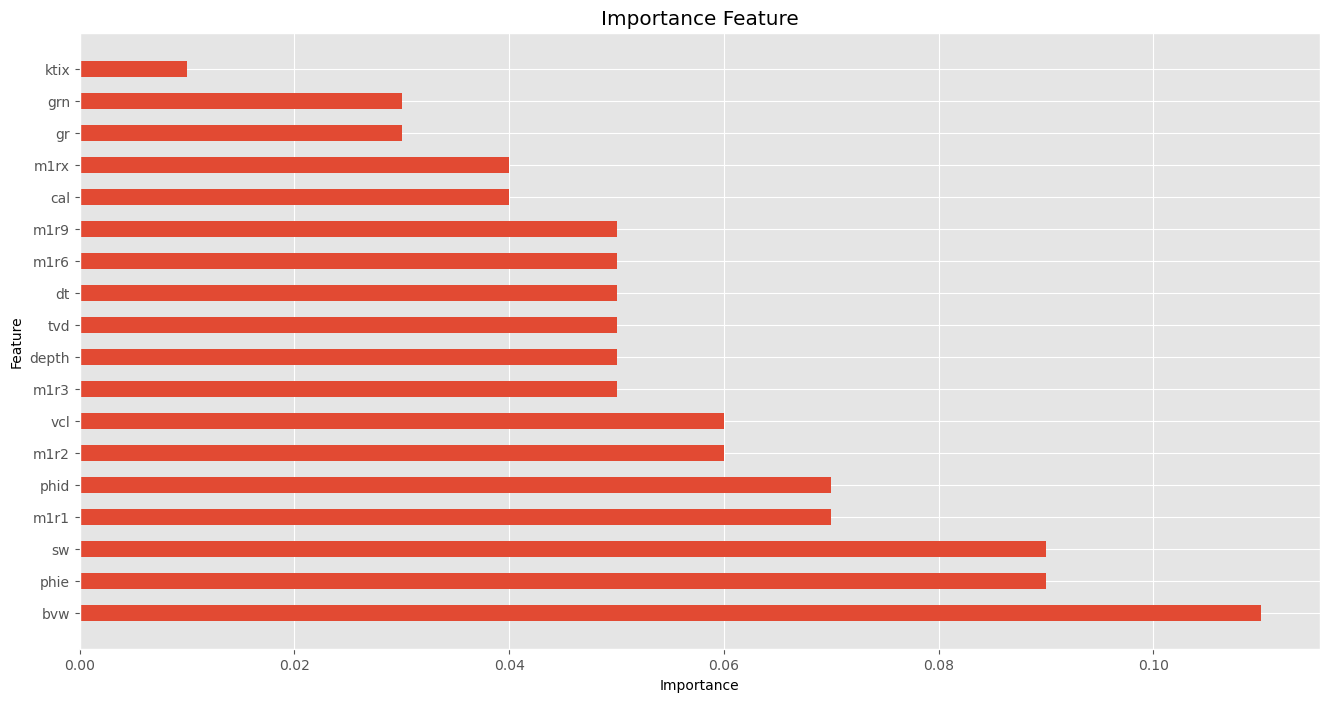

In [275]:
fig, axis = plt.subplots(figsize=(16, 8))
df['importance']= df['importance'].round(decimals = 2)
x = df['feature']
y = df['importance']

print("importance:", y)

bars = axis.barh(x, y, 0.5)
plt.title('Importance Feature')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The two datasets, with the top 7 features and their importance level:


|  Datasets  | 1st  | 2nd   | 3rd | 4th  | 5th  | 6th | 7th  |
|:----------:|:----:|:-----:|:---:|:----:|:----:|:---:|:----:|
|  Dataset1  |  bvw |  phie | sw  | m1r1 | phid | vcl | m1r2 |
|  Dataset2  |  sw  |  phie | bvw | vcl  | grn  | ktix| sphi |


## Conclusiones


**After the results obtained from the calculated metrics, the following insights were obtained:**

1. Among the features that coincide between the two datasets and that contribute most to the explanation of the importance of variability are: bvw, sw, vcl, which coincide with the literature as the main characteristics for characterizing exploration wells.

2. From previous steps, the importance of the features of dataset 2 was obtained, obtaining that the top 5 features that contribute most to the explanation of the variability are: sw, phie, bvw, vcl, grn, ktix and sphi.

3. Other new features that can be added are from table 1: m1r1, phid, m1r2 to make characterizations of exploration wells.

4. Other group of features that can be added from table 2 are: sphi, ktix, grn to make characterizations of exploration wells.

5. Of the 3 algorithms, the decision tree and the Random Forest provided the best results in the metrics of Accuracy, Precision, recall score, and F1 score while the logistic regression showed a worse performance result in the metrics.

6. It was also found that the Random Forest algorithm was the slowest of all.